In [1]:
import os
import pandas as pd
import numpy as np
from arch.univariate import EWMAVariance
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro,normaltest
from pyspc import *

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
%matplotlib inline

# Import required libraries
import statistics

C:\Users\Simranpal Kohli\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('D:\\OneDrive\\OneDrive\\MSc_Project\\Data')
Zero_df=pd.read_csv('Zero_df.csv')
Zero_df.drop('Unnamed: 0', axis=1, inplace=True)
Weighted_Mean_df=pd.read_csv('WeightedMean.csv')
Weighted_Mean_df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
def mask_one_equal(df, key, value):
   return df[df[key] == value]
pd.DataFrame.mask_one_equal = mask_one_equal

def mask_many_equal(df, key, value):
   return df[df[key].isin(value)]
pd.DataFrame.mask_many_equal = mask_many_equal

Test
Value is 0.09733421427847472 Batch Number is: 7
Value is 0.12566889248601038 Batch Number is: 8
Value is 0.1294064805409058 Batch Number is: 9
Value is 0.15613079544241112 Batch Number is: 10
Value is 0.12129631426016493 Batch Number is: 11
Value is 0.12396803026931506 Batch Number is: 12
Value is 0.12169050112829458 Batch Number is: 13
Value is 0.15548119773460112 Batch Number is: 14
Value is 0.14015786812457676 Batch Number is: 15
Value is 0.12532596365720827 Batch Number is: 16
Value is 0.13137572783496454 Batch Number is: 17
Value is 0.19021497772113094 Batch Number is: 18
Value is 0.1622462051939109 Batch Number is: 19
Value is 0.13806622710197528 Batch Number is: 20
Value is 0.15430588191692554 Batch Number is: 21
Value is 0.09234306593286465 Batch Number is: 22
Value is 0.10776673205860463 Batch Number is: 39
Value is 0.11383069525255055 Batch Number is: 40
Value is 0.15864814240651748 Batch Number is: 41
Value is 0.1768255384134183 Batch Number is: 42
Value is 0.2391362442

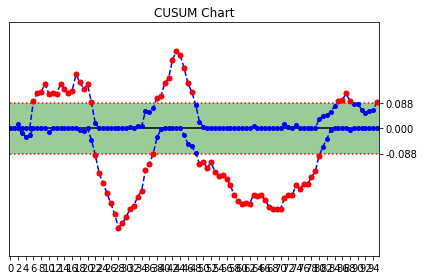

<pyspc: (84334265173)>


In [4]:
nobatch=Weighted_Mean_df.columns.drop(['Batch'])
a = spc(Weighted_Mean_df[nobatch]) + cusum() + rules()
print(a)

# a = spc(Weighted_Mean_df[nobatch]) + hotelling() + rules()
# print(a)

0.022019459004540682 4 0.08807783601816273 -0.08807783601816273
CPLUS
Value is 0.09733421427847472 Batch Number is: 7
Value is 0.12566889248601038 Batch Number is: 8
Value is 0.1294064805409058 Batch Number is: 9
Value is 0.15613079544241112 Batch Number is: 10
Value is 0.12129631426016493 Batch Number is: 11
Value is 0.12396803026931506 Batch Number is: 12
Value is 0.12169050112829458 Batch Number is: 13
Value is 0.15548119773460112 Batch Number is: 14
Value is 0.14015786812457676 Batch Number is: 15
Value is 0.12532596365720827 Batch Number is: 16
Value is 0.13137572783496454 Batch Number is: 17
Value is 0.19021497772113094 Batch Number is: 18
Value is 0.1622462051939109 Batch Number is: 19
Value is 0.13806622710197528 Batch Number is: 20
Value is 0.15430588191692554 Batch Number is: 21
Value is 0.09234306593286465 Batch Number is: 22
Value is 0.10776673205860463 Batch Number is: 39
Value is 0.11383069525255055 Batch Number is: 40
Value is 0.15864814240651748 Batch Number is: 41
Valu

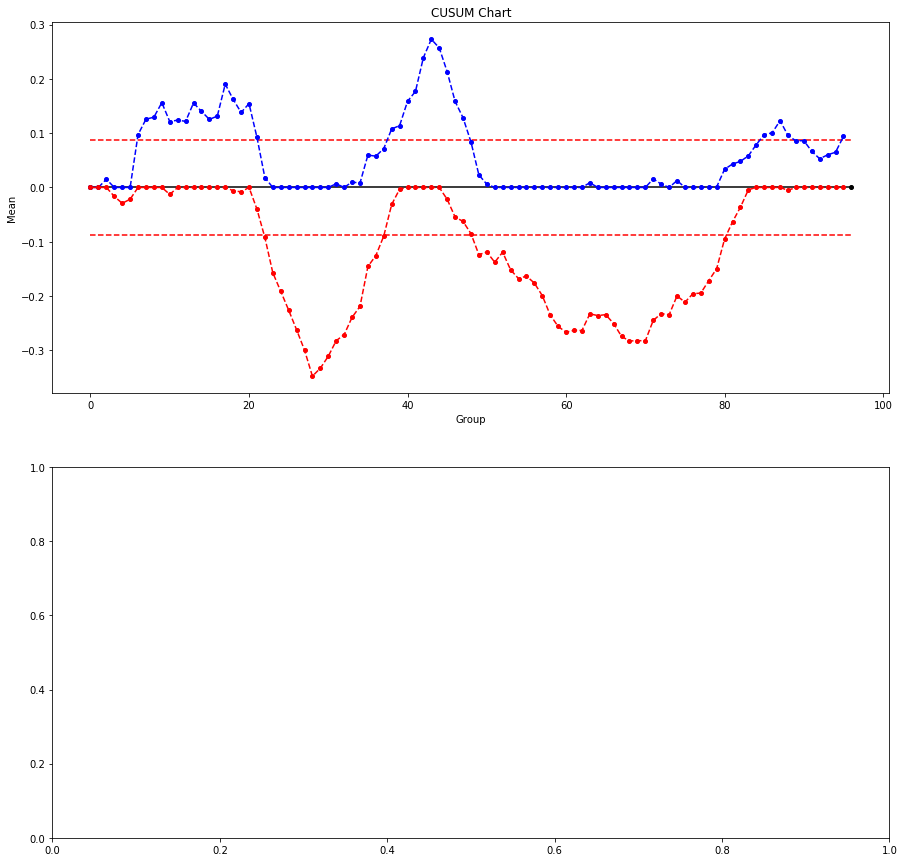

In [5]:
import numpy as np
def CUSUM_pyspc(data,std=None,target=None):
    
    d2 = [0, 0, 1.128, 1.693, 2.059, 2.326, 2.534, 2.704, 2.847, 2.970, 3.078]
    interval=4
    data = np.mean(data, axis=1)
    
    if target is None:
        target = np.mean(data)
        
    if std is None:
        rbar = []
    for i in range(len(data) - 1):
        rbar.append(abs(data[i] - data[i + 1]))
    std = np.mean(rbar) / d2[2]
    k = std / 2
    
    cplus = []  # values
    cminus = []  # values
    i, j = 0, 0
    for xi in data:
        cplus.append(max([0, xi - (target + k) + i]))
        cminus.append(min([0, xi - (target - k) + j]))
        i, j = cplus[-1], cminus[-1]

    lcl = -interval * std
    ucl = interval * std
    center = 0
    ptr=0
    print(std,interval,ucl,lcl)
    print("CPLUS")
    CPLUS_ls=[]
    for values in cplus:
            ptr=ptr+1
            if(values>=ucl):
                CPLUS_ls.append(ptr)
                print("Value is",values,"Batch Number is:",ptr)

    fig, axs = plt.subplots(2, figsize=(15,15))

    axs[0].plot([0, len(cplus)], [center, center], 'k-', linestyle='-', marker='o', color='black')
    axs[0].plot([0, len(cplus)], [lcl, lcl], 'r:', color='red', linestyle='dashed')
    axs[0].plot([0, len(cplus)], [ucl, ucl], 'r:', color='red', linestyle='dashed')
    axs[0].plot(cplus, 'bo--', color='blue')
    axs[0].plot(cminus, 'bo--',color='red')
    axs[0].set_title('CUSUM Chart')
    axs[0].set(xlabel='Group', ylabel='Mean')
    return CPLUS_ls
    
# i = 0
# control = True
# for group in s:
#     if group > 1.593*statistics.mean(s) or group < 0.407*statistics.mean(s):
#         print('Group', i, 'out of standard deviation cotrol limits!')
#         control = False
#     i += 1
# if control == True:
#     print('All points within control limits.')
##--------Data reading---------------
CUSUM_CPLUS_ls=CUSUM_pyspc(Weighted_Mean_df[nobatch].values)

In [6]:
print(CUSUM_CPLUS_ls)

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 86, 87, 88, 89, 96]


UCL_Line
Value is 0.035679777576301815 Batch Number is: 9
Value is 0.0371917021550645 Batch Number is: 17
Value is -0.007402904935100934 Batch Number is: 23
Value is -0.010733742386410113 Batch Number is: 24
Value is -0.013686098130172979 Batch Number is: 25
Value is -0.016311955456831513 Batch Number is: 26
Value is -0.020533388193522083 Batch Number is: 27
Value is -0.011351529231643995 Batch Number is: 28
Value is -0.0025666938656767856 Batch Number is: 29
Value is 0.005825298797500508 Batch Number is: 30
Value is 0.04873681928142598 Batch Number is: 40
Value is 0.05798289668303121 Batch Number is: 41
Value is 0.05966816964533049 Batch Number is: 42
Value is 0.051083100611319314 Batch Number is: 43
Value is 0.03861609754109248 Batch Number is: 44
Value is -0.0061360908322745395 Batch Number is: 58
Value is -0.004900209235406538 Batch Number is: 59
Value is -0.001100885665280185 Batch Number is: 60
Value is 0.0011714999674172126 Batch Number is: 61


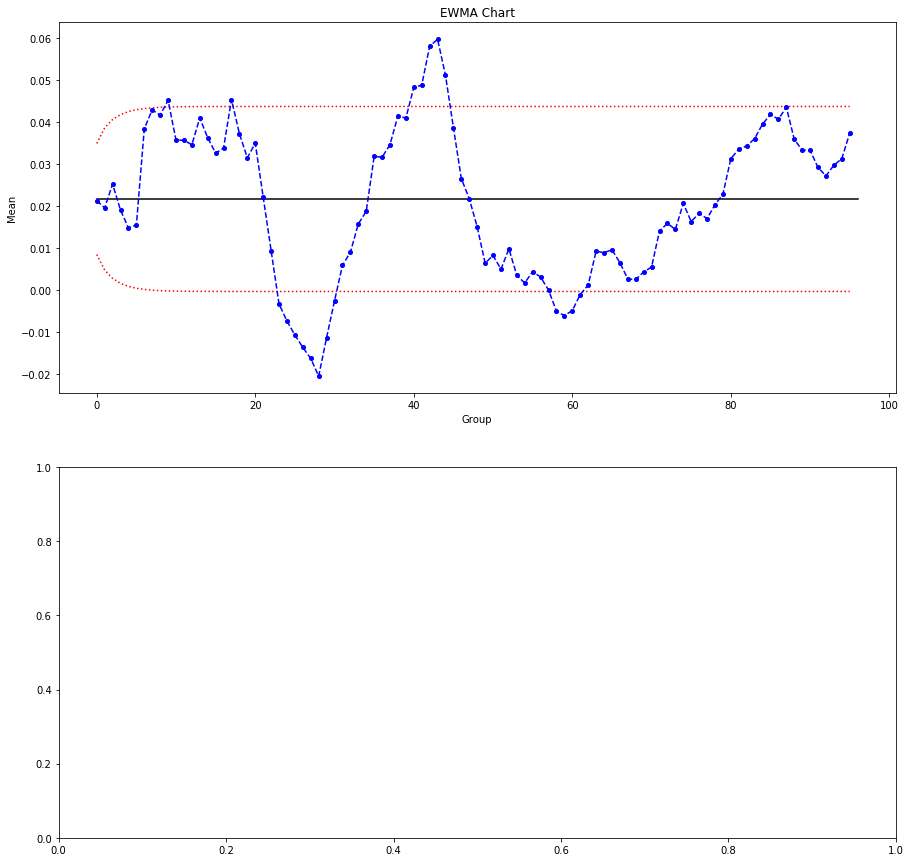

In [7]:
def EWMA_pyspc(data,weight=0.2,target=None):
    
    d2 = [0, 0, 1.128, 1.693, 2.059, 2.326, 2.534, 2.704, 2.847, 2.970, 3.078]
    data = np.mean(data, axis=1)
    
    if target is None:
        target = np.mean(data)
    rbar = []    
    for i in range(len(data) - 1):
        rbar.append(abs(data[i] - data[i + 1]))
    std = np.mean(rbar) / d2[2]
    
    ewma = []  # values
    i = target
    for x in data:
        ewma.append(weight * x + (1 - weight) * i)
        i = ewma[-1]
        
    print("UCL_Line")
    EWMA_ls=[]
    ptr=0
    lcl, ucl = [], []
    for i in range(1, len(data) + 1):
        lcl.append(target - 3 * (std) * np.sqrt((weight / (2 - weight)) * (1 - (1 - weight)**(2 * i))))
        ucl.append(target + 3 * (std) * np.sqrt((weight / (2 - weight)) * (1 - (1 - weight)**(2 * i))))
        if(ewma[ptr]>=ucl[ptr] or ewma[ptr]<=lcl[ptr]):
            EWMA_ls.append(ptr)
            print("Value is",ewma[i],"Batch Number is:",ptr)
        ptr=ptr+1
    
        
    fig, axs = plt.subplots(2, figsize=(15,15))
    axs[0].plot([0, len(ewma)], [target, target], 'k-')
    axs[0].plot(lcl, 'r:')
    axs[0].plot(ucl, 'r:')
    axs[0].plot(ewma, 'bo--')
    axs[0].set_title('EWMA Chart')
    axs[0].set(xlabel='Group', ylabel='Mean')
    return EWMA_ls

EWMA_ls=EWMA_pyspc(Weighted_Mean_df[nobatch].values)

In [8]:
# x=Weighted_Mean_df[nobatch].values
nobatch=['AIR101', 'AIR121pH', 'PIR112', 'TIR101']

Group 6 out of mean control limits!
Group 17 out of mean control limits!
Group 22 out of mean control limits!
Group 23 out of mean control limits!
Group 35 out of mean control limits!
Group 42 out of mean control limits!
Group 25 out of range cotrol limits!
Group 46 out of range cotrol limits!


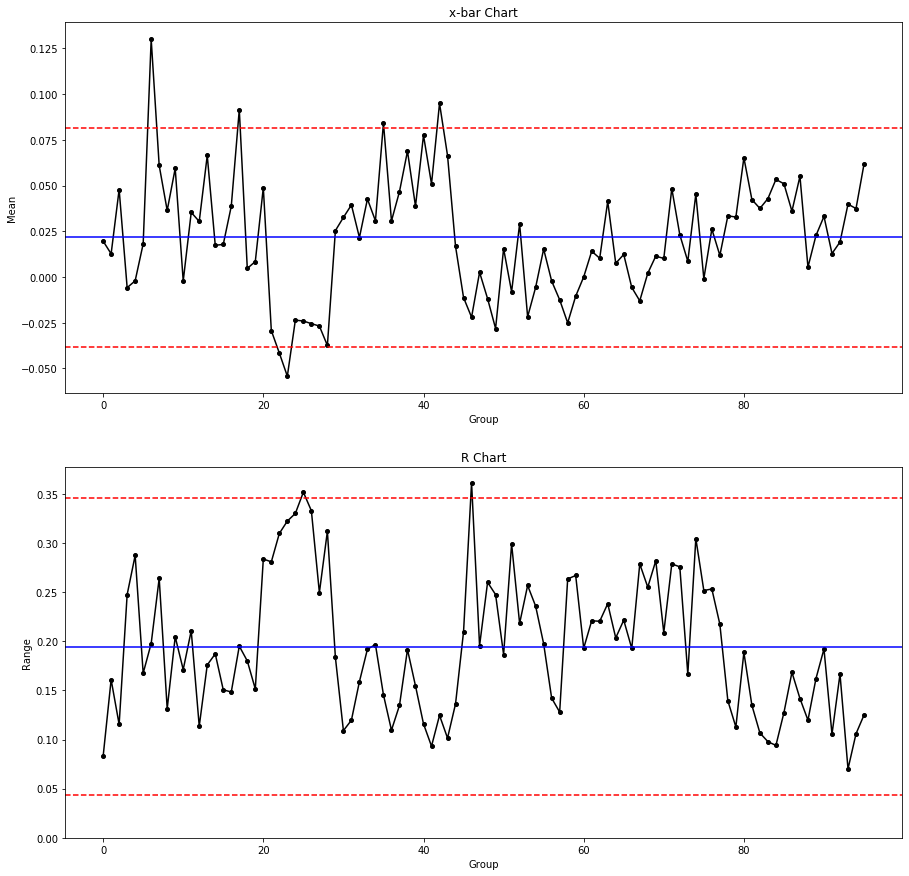

In [9]:
x=Weighted_Mean_df[nobatch].values
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

# Get and append groups means and ranges
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
A2=0.308
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
D4=1.777
D3=0.223
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r) or group < D3*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

In [10]:
def h4_table():
    h4 = [[0, 8.6336,  10.8140, 12.7231, 14.5363, 16.2634, 17.9269, 19.5410, 21.1152, 22.6565],
          [0, 9.6476,  11.8961, 13.8641, 15.7293, 17.5038, 19.2113, 20.8665, 22.4796, 24.0579],
          [0, 10.0830, 12.3505, 14.3359, 16.2170, 18.0063, 19.7276, 21.3960, 23.0217, 24.6119],
          [0, 10.3114, 12.5845, 14.5760, 16.4629, 18.2578, 19.9845, 21.6581, 23.2887, 24.8838],
          [0, 10.4405, 12.7143, 14.7077, 16.5965, 18.3935, 20.1223, 21.7980, 23.4307, 25.0278],
          [0, 10.5152, 12.7880, 14.7818, 16.6711, 18.4687, 20.1982, 21.8747, 23.5082, 25.1062],
          [0, 10.5581, 12.8297, 14.8234, 16.7127, 18.5105, 20.2403, 21.9171, 23.5510, 25.1493],
          [0, 10.5816, 12.8524, 14.8460, 16.7352, 18.5331, 20.2631, 21.9401, 23.5742, 25.1728],
          [0, 10.5932, 12.8635, 14.8570, 16.7463, 18.5442, 20.2743, 21.9515, 23.5858, 25.1846]]
    return h4


In [11]:
h4=h4_table()
lambd=0.09
int(lambd*10)
h4[int(lambd*10)-1][3]

14.857

# MEWMA control chart

[5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
12.7231
      AIR101  AIR121pH    PIR112    TIR101  Z_AIR101  Z_AIR121pH  Z_PIR112  \
0   0.024997 -0.007625  0.071988 -0.010816  0.000018    0.000310 -0.000122   
1   0.050842 -0.076348  0.084662 -0.008387  0.000165    0.000275 -0.000180   
2   0.044790 -0.014370  0.101102  0.059847  0.000280    0.000550 -0.000155   
3   0.042257 -0.141118  0.106531 -0.030966  0.000383    0.000190 -0.000104   
4   0.021080 -0.129664  0.157872 -0.057570  0.000379   -0.000111  0.000204   
..       ...       ...       ...       ...       ...         ...       ...   
91  0.069900 -0.017178  0.034227 -0.035568  0.000598   -0.001460 -0.000384   
92  0.034040 -0.051380  0.115302 -0.021496  0.000658   -0.001361 -0.000287   
93  0.06

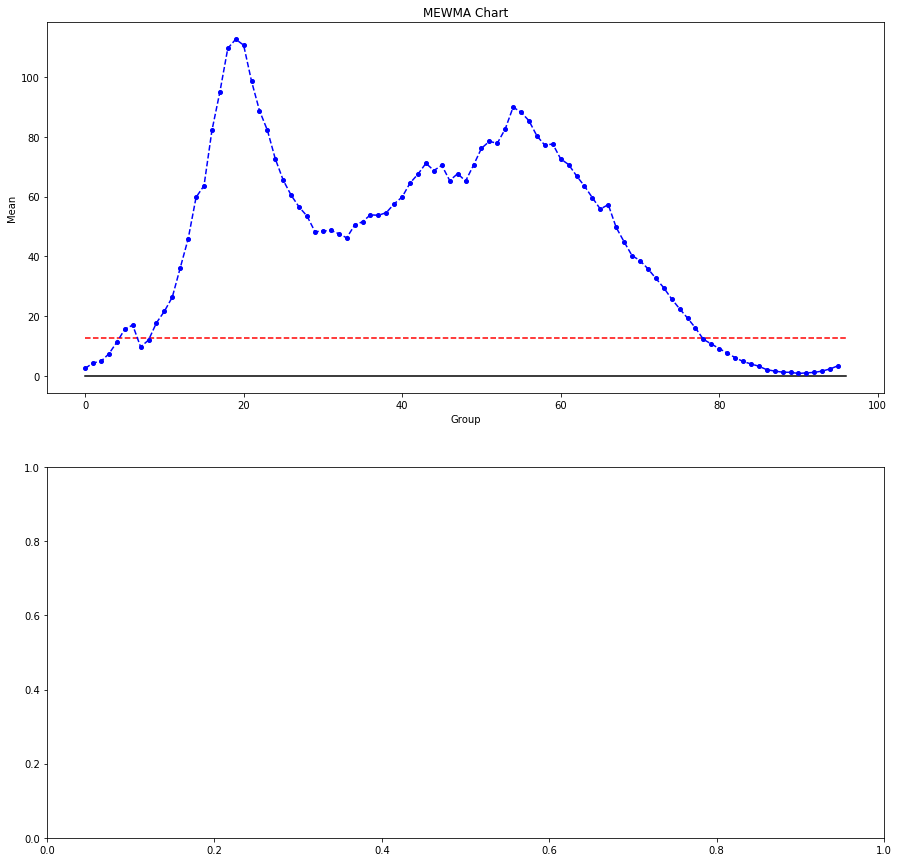

In [12]:
colnames=['AIR101', 'AIR121pH', 'PIR112', 'TIR101','Z_AIR101','Z_AIR121pH','Z_PIR112','Z_TIR101','T2','Control']
def mewma(data,lambd=0.1,newdata=None,col_names_ls=colnames):
    
    actual_df = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1],'Colum3':data[:,2],'Colum4':data[:,3]})
    h4=h4_table()
    nrow, ncol = data.shape
    mean = data.mean(axis=0)

    v = np.zeros(shape=(nrow - 1, ncol))
    for i in range(nrow - 1):
        v[i] = data[i + 1] - data[i]

    vv = v.T @ v

    s = np.zeros(shape=(ncol, ncol))
    for i in range(ncol):
        s[i] = (1 / (2 * (nrow - 1))) * (vv[i])

    mx = data - mean

    z = np.zeros(shape=(nrow + 1, ncol))
    for i in range(nrow):
        z[i + 1] = lambd * mx[i] + (1 - lambd) * z[i]
    z = z[1:, :]
    Z_df=pd.DataFrame(z)

    t2 = [] # values
    for i in range(nrow):
        w = (lambd / (2 - lambd)) * (1 - (1 - lambd)**(2 * (i + 1)))
        inv = np.linalg.inv(w * s)
        t2.append((z[i].T @ inv) @ z[i])
        
    t2_df=pd.DataFrame(t2)
    ls_1=int(lambd * 10)
    if ls_1>=1:
        ucl = h4[int(lambd * 10) - 1][ncol - 1]
    else:
        ucl=h4[0][ncol-1]
    
    MEWMA_ls=[]
    In_Out_ls=[]
    ptr=0
    for i in range(1, len(data) + 1):
        if(t2[ptr]>ucl):
            In_Out_ls.append("OOC")
            MEWMA_ls.append(ptr)
#             print("Sample Number is:",ptr)
        else:
            In_Out_ls.append("IN")
        ptr=ptr+1
    
    In_Out_df=pd.DataFrame(In_Out_ls)
    complete_df=pd.concat([actual_df,Z_df, t2_df,In_Out_df], axis=1, ignore_index=True)
    complete_df.columns = col_names_ls
    fig, axs = plt.subplots(2, figsize=(15,15))
    axs[0].plot([0, len(t2)], [0,0], 'k-')
    axs[0].plot([0, len(t2)], [ucl, ucl], 'r:', color='red', linestyle='dashed')
    axs[0].plot(t2, 'bo--')
    axs[0].set_title('MEWMA Chart')
    axs[0].set(xlabel='Group', ylabel='Mean')
    
    return MEWMA_ls,complete_df,ucl
    
mewma_ls,complete_df,ucl=mewma(Weighted_Mean_df[nobatch].values,lambd=0.005,newdata=None)
print(mewma_ls)
print(ucl)
print(complete_df)

In [13]:
# print(complete_df.mask_one_equal(8,'OOC'))
# print(complete_df.to_string())

## EWMA Control chart

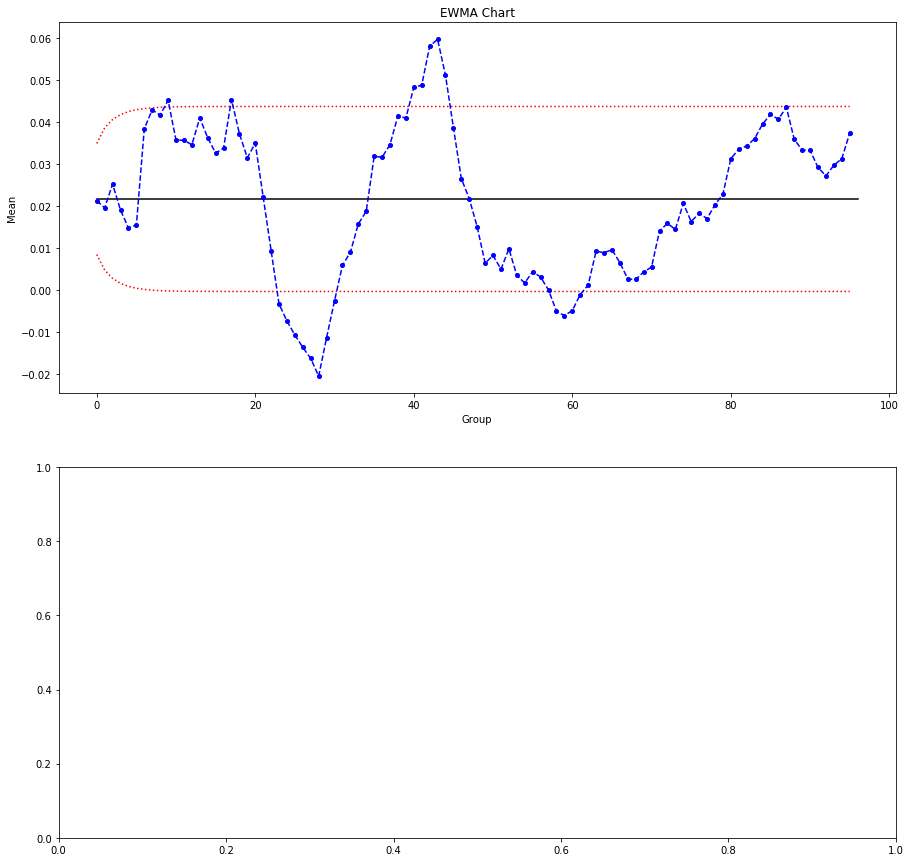

In [14]:
def EWMA_pyspc(data,weight=0.2,target=None):
    
    d2 = [0, 0, 1.128, 1.693, 2.059, 2.326, 2.534, 2.704, 2.847, 2.970, 3.078]
    data = np.mean(data, axis=1)
    
    if target is None:
        target = np.mean(data)
    rbar = []    
    for i in range(len(data) - 1):
        rbar.append(abs(data[i] - data[i + 1]))
    std = np.mean(rbar) / d2[2]
    
    ewma = []  # values
    i = target
    for x in data:
        ewma.append(weight * x + (1 - weight) * i)
        i = ewma[-1]
        
    EWMA_ls=[]
    ptr=0
    lcl, ucl = [], []
    for i in range(1, len(data) + 1):
        lcl.append(target - 3 * (std) * np.sqrt((weight / (2 - weight)) * (1 - (1 - weight)**(2 * i))))
        ucl.append(target + 3 * (std) * np.sqrt((weight / (2 - weight)) * (1 - (1 - weight)**(2 * i))))
        if(ewma[ptr]>=ucl[ptr] or ewma[ptr]<=lcl[ptr]):
            EWMA_ls.append(ptr)
#             print("Sample Number is:",ptr)
        ptr=ptr+1
        
    fig, axs = plt.subplots(2, figsize=(15,15))
    axs[0].plot([0, len(ewma)], [target, target], 'k-')
    axs[0].plot(lcl, 'r:')
    axs[0].plot(ucl, 'r:')
    axs[0].plot(ewma, 'bo--')
    axs[0].set_title('EWMA Chart')
    axs[0].set(xlabel='Group', ylabel='Mean')
    return EWMA_ls

EWMA_ls=EWMA_pyspc(Weighted_Mean_df[nobatch].values)

# MEWMA control chart

[4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 35, 40, 41, 42, 43, 46, 49, 50, 51, 53, 54, 67, 68, 69, 71, 73, 74, 75, 76, 77, 78, 82, 85, 86, 89, 90, 91, 94, 95]
10.8
     count      %
OOC     51  53.12
IN      45  46.88


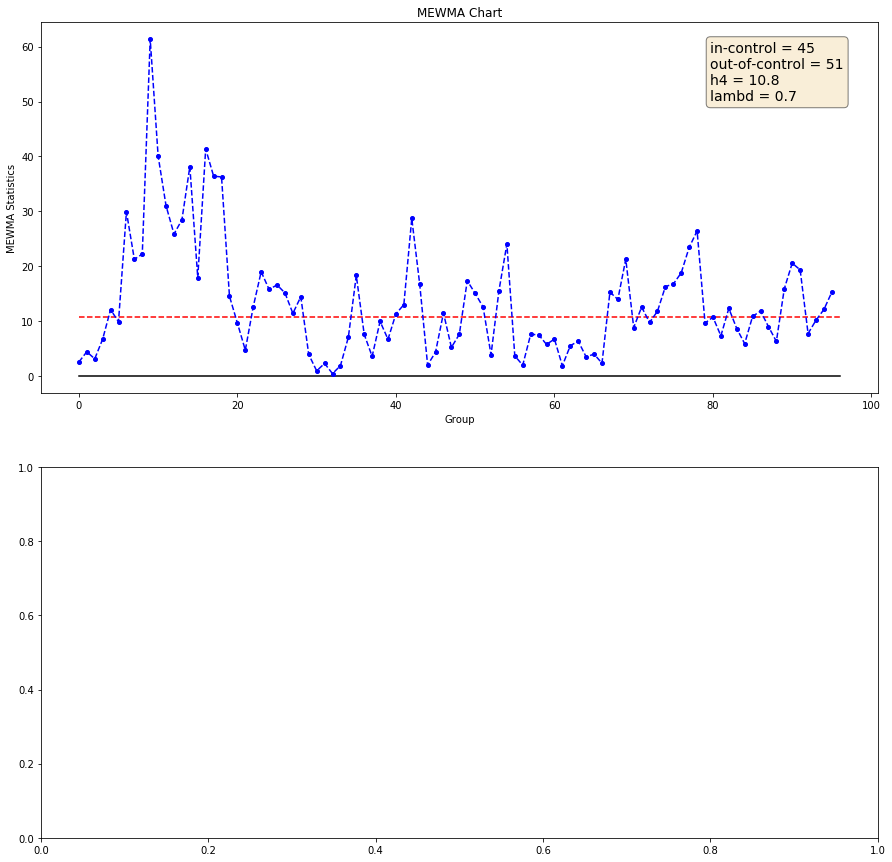

In [15]:
colnames=['AIR101', 'AIR121pH', 'PIR112', 'TIR101','Z_AIR101','Z_AIR121pH','Z_PIR112','Z_TIR101','T2','Control']
def mewma_new(data,lambd=0.1,newdata=None,col_names_ls=colnames,h4=0):
    
    actual_df = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1],'Colum3':data[:,2],'Colum4':data[:,3]})
#     h4=h4_table()
    nrow, ncol = data.shape
    mean = data.mean(axis=0)

    v = np.zeros(shape=(nrow - 1, ncol))
    for i in range(nrow - 1):
        v[i] = data[i + 1] - data[i]

    vv = v.T @ v

    s = np.zeros(shape=(ncol, ncol))
    for i in range(ncol):
        s[i] = (1 / (2 * (nrow - 1))) * (vv[i])

    mx = data - mean

    z = np.zeros(shape=(nrow + 1, ncol))
    for i in range(nrow):
        z[i + 1] = lambd * mx[i] + (1 - lambd) * z[i]
    z = z[1:, :]
    Z_df=pd.DataFrame(z)

    t2 = [] # values
    for i in range(nrow):
        w = (lambd / (2 - lambd)) * (1 - (1 - lambd)**(2 * (i + 1)))
        inv = np.linalg.inv(w * s)
        t2.append((z[i].T @ inv) @ z[i])
        
    t2_df=pd.DataFrame(t2)
    
#     ls_1=int(lambd * 10)
#     if ls_1>=1:
#         ucl = h4[int(lambd * 10) - 1][ncol - 1]
#     else:
#         ucl=h4[0][ncol-1]    
    ucl=h4
    MEWMA_ls=[]
    In_Out_ls=[]
    ptr=0
    for i in range(1, len(data) + 1):
        if(t2[ptr]>ucl):
            In_Out_ls.append("OOC")
            MEWMA_ls.append(ptr)
#             print("Sample Number is:",ptr)
        else:
            In_Out_ls.append("IN")
        ptr=ptr+1
    
    In_Out_df=pd.DataFrame(In_Out_ls)
    complete_df=pd.concat([actual_df,Z_df, t2_df,In_Out_df], axis=1, ignore_index=True)
    complete_df.columns = col_names_ls
    
    c = complete_df.Control.value_counts()
    p=round(complete_df.Control.value_counts(normalize=True)* 100,2)
    percent_df=pd.concat([c,p], axis=1, keys=['count','%'])
    
    
    in_control="in-control = {}".format(percent_df.loc['IN','count'])
    out_control="out-of-control = {}".format(percent_df.loc['OOC','count'])
    str_h4="h4 = {}".format(h4)
    str_lambd="lambd = {}".format(lambd)
#     str3 = in_control + '\n' + out_control
    str3 = '\n'.join([in_control, out_control,str_h4,str_lambd])
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    fig, axs = plt.subplots(2, figsize=(15,15))
    axs[0].plot([0, len(t2)], [0,0], 'k-')
    axs[0].plot([0, len(t2)], [ucl, ucl], 'r:', color='red', linestyle='dashed')
    axs[0].plot(t2, 'bo--')
    axs[0].set_title('MEWMA Chart')
    axs[0].set(xlabel='Group', ylabel='MEWMA Statistics')
    axs[0].text(0.80, 0.95, str3, transform=axs[0].transAxes, fontsize=14,verticalalignment='top', bbox=props)
    return MEWMA_ls,complete_df,ucl,percent_df
    
mewma_ls,complete_df,ucl,percent_df=mewma_new(Weighted_Mean_df[nobatch].values,newdata=None,lambd=0.7,h4=10.80)
print(mewma_ls)
# print(complete_df)
print(ucl)
print(percent_df)
writer = pd.ExcelWriter("percent_df.xlsx", engine='xlsxwriter')
percent_df.to_excel(writer, "Describe")
writer.save()

In [16]:
# textstr = '\n'.join(("in-control %"=percent_df.iloc[0,1]),
#                     ("out-of-control %"=percent_df.iloc[1,1]),
#                     ("h4="=0.5))
# '\n'.join("in-control %="percent_df.iloc[0,1])


In [18]:
# textstr = '\n'.join((
#     r'$\mu=%.2f$' % (mu, ),
#     r'$\mathrm{median}=%.2f$' % (median, ),
#     r'$\sigma=%.2f$' % (sigma, )))

In [19]:
percent_df.iloc[0,1]

53.12

[17, 18, 19, 21, 22, 23, 24, 25, 38, 39, 40, 42, 43]
10.8
     count      %
IN      33  71.74
OOC     13  28.26
['Equil_Rinse_I', 'FILTER_FILL', 'Guanidine_Prime_Post_Use', 'Intermediate_Wash', 'LOADING', 'PRIME_SODIUM_CITRATE_PH5_0', 'PROCESS_SETUP', 'Pre_use_Rinse_Airtrap', 'STORAGE_OUTLET', 'STORAGE_RECIRCULATION_VALVE', 'Setup', 'Skid_clean_post_use', 'Skid_store']


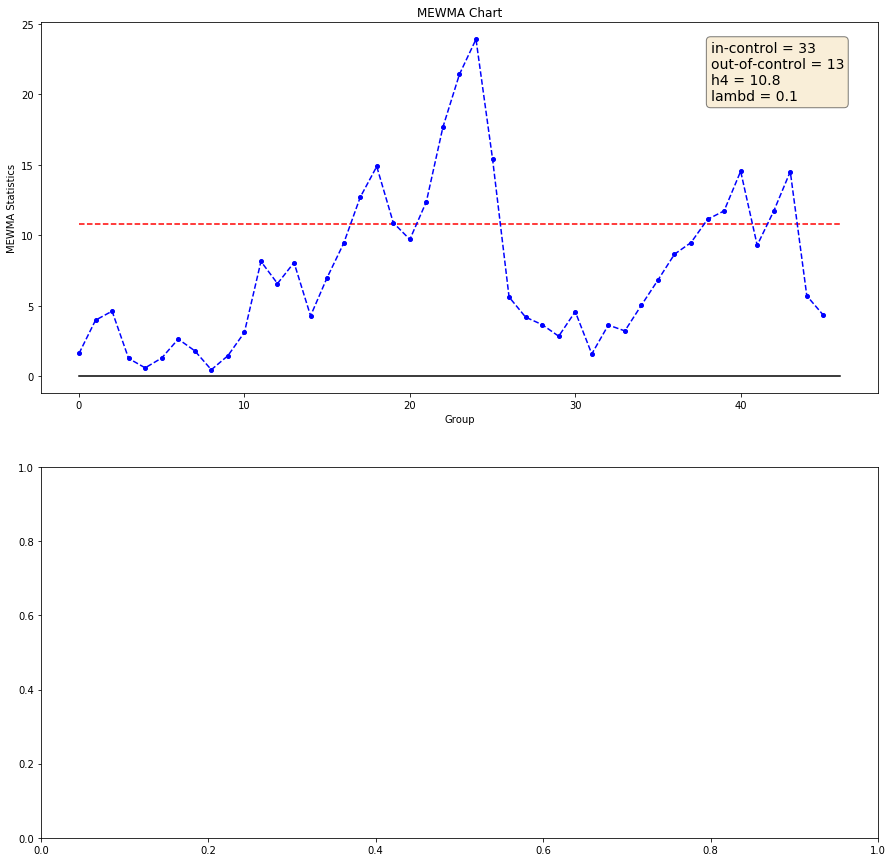

In [20]:
CV_ls=Zero_df.columns.drop(['Batch'])
Currentblock_df=Zero_df.mask_one_equal('Batch',901156)[CV_ls].groupby(['CurrentBlock']).mean()
EWMA_ls,complete_df,ucl,percent_df=mewma_new(Currentblock_df.values,lambd=0.1,newdata=None,h4=10.80)
print(EWMA_ls)
print(ucl)
print(percent_df)
test_cb_df=Currentblock_df.reset_index()
print(list(test_cb_df.iloc[EWMA_ls,0]))

# Phase Wise MEWMA

Batch 899032.0
      AIR101  AIR121pH    PIR112    TIR101  Z_AIR101  Z_AIR121pH  Z_PIR112  Z_TIR101         T2 Control                           Phase
0   0.359138 -0.152438 -0.009836 -1.015649  0.080730   -0.087510 -0.219829 -0.516363   3.278830      IN               Additional_Wash_1
1  -1.161535 -0.647520 -0.146450 -0.663770 -0.639241   -0.378806 -0.398051 -0.598605   3.002335      IN  Block_SODIUM_CITRATE_PH_5_WASH
2  -1.780005 -2.165712  1.502756  1.651642 -1.308462   -1.283550  0.337441  0.517980  14.137709      IN                   CITRATE_RINSE
3  -0.976145 -1.035636  0.261808 -0.122282 -1.241142   -1.170884  0.084713  0.189310   7.783565      IN                 CITRATE_RINSE_I
4   1.096429  2.712650  1.091141  1.501583 -0.171196    0.759592  0.373015  0.836908   6.665200      IN                   CLEAN_AIRTRAP
5   1.161602  2.745884 -0.490870  1.597769  0.396364    1.741447 -0.273839  1.208800  13.078835      IN             CLEAN_COLUMN_TUBING
6   1.166464  2.742989  1.134687 

      AIR101  AIR121pH    PIR112    TIR101  Z_AIR101  Z_AIR121pH  Z_PIR112  Z_TIR101         T2 Control                           Phase
0   0.959440 -1.537691 -0.923005  0.634901  0.368338   -0.409608 -0.895063  0.471831   9.716299      IN                                
1   0.385904  0.511907  0.339085 -1.024608  0.265739    0.410387 -0.711549 -0.122007   3.038294      IN               Additional_Wash_1
2  -1.124472 -0.512452  0.830234 -0.146100 -0.540748    0.308205 -0.374218  0.020328   2.636663      IN  Block_SODIUM_CITRATE_PH_5_WASH
3  -0.756914  0.373389 -0.710180 -0.851977 -0.760213    0.700035 -0.975759 -0.261444   8.583341      IN                 CITRATE_RINSE_I
4   1.099667 -1.283836  1.324875  0.149970  0.058345    0.067337 -0.259002  0.098644   0.575217      IN                   CLEAN_AIRTRAP
5   1.174415 -1.283836  1.971066  0.116914  0.504998   -0.249012  0.422472  0.262160   2.084837      IN             CLEAN_COLUMN_TUBING
6   1.030778 -1.283836  0.318148  0.333867  0.65

      AIR101  AIR121pH    PIR112    TIR101  Z_AIR101  Z_AIR121pH  Z_PIR112  Z_TIR101         T2 Control                           Phase
0   0.159841 -0.040363 -0.154215  1.608640  0.100804    0.157479 -0.518283  0.246599   1.610090      IN                                
1  -0.329234  0.910873 -0.630718 -0.961499 -0.093332    0.711837 -1.015677 -0.915170   4.992544      IN               Additional_Wash_1
2  -1.382281  0.213442  0.806292 -0.234915 -0.716923    0.640300 -0.545868 -1.132763   4.704447      IN                 CITRATE_RINSE_I
3   1.033559 -1.250242  1.472209  2.061747  0.179201   -0.127310  0.021995 -0.093229   0.247910      IN                   CLEAN_AIRTRAP
4   1.043034 -1.250242  1.792670  1.807182  0.632001   -0.511115  0.466156  0.299256   1.917379      IN             CLEAN_COLUMN_TUBING
5   1.042247 -1.250242  2.177672  1.796022  0.858007   -0.703018  0.880738  0.489919   4.236715      IN                    CLEAN_FILTER
6   1.047299 -1.250242  1.792670  1.818920  0.97

Batch 902020.0
      AIR101  AIR121pH    PIR112    TIR101  Z_AIR101  Z_AIR121pH  Z_PIR112  Z_TIR101         T2 Control                           Phase
0   0.908975  2.608834 -2.308661 -0.145356  0.495042    1.189017 -1.442788 -0.512863   8.628006      IN                                
1  -0.356300  0.949547  0.625530 -1.002995  0.109925    0.953882 -0.697087 -1.198114   8.725656      IN               Additional_Wash_1
2  -1.841666 -1.611333  0.293202  1.935736 -0.825316   -0.444126 -0.490401 -0.071375   2.559900      IN                   CITRATE_RINSE
3  -1.400238 -0.010776  0.608894  1.277770 -1.072223   -0.342852 -0.229211  0.163013   2.418663      IN                 CITRATE_RINSE_I
4   1.033925 -1.111702  2.218809  2.183270  0.021405   -0.842677  0.706341  0.732956   4.063511      IN                   CLEAN_AIRTRAP
5   1.042840 -1.111702  2.389256  1.893405  0.572677   -1.092590  1.259341  0.872995   7.108621      IN             CLEAN_COLUMN_TUBING
6   1.035760 -1.111702  2.566764 

      AIR101  AIR121pH    PIR112    TIR101  Z_AIR101  Z_AIR121pH  Z_PIR112  Z_TIR101         T2 Control                           Phase
0   0.901416 -1.132898  0.441702  0.568694  0.540953   -0.735175 -0.074798  0.074067   3.038379      IN                                
1  -0.424727  0.607463  0.277624 -0.960841  0.148359   -0.232581 -0.194236 -0.653666   2.141455      IN               Additional_Wash_1
2  -1.525605 -0.063763  0.483100 -0.680728 -0.598378   -0.316898 -0.151217 -0.877476   3.345847      IN                 CITRATE_RINSE_I
3   1.036428  2.706401  1.345638  1.217733  0.309271    1.026026  0.301562 -0.040151   3.430238      IN                   CLEAN_AIRTRAP
4   1.035679  2.727163  2.115278  0.661547  0.762720    1.707869  0.912771  0.100419  10.450637      IN             CLEAN_COLUMN_TUBING
5   0.988020  2.512168  1.555064  0.406079  0.965616    1.941293  0.938268  0.042969  13.394226      IN                     CLEAN_INLET
6   1.070745  2.738597  1.763785  0.796195  1.10

      AIR101  AIR121pH    PIR112    TIR101  Z_AIR101  Z_AIR121pH  Z_PIR112  Z_TIR101         T2 Control                           Phase
0   0.895287 -1.095556  1.519089  1.755393  0.372584   -0.269995  0.436256  0.352986   1.069043      IN                                
1  -0.406630  0.576654 -2.528318 -0.952102 -0.092082    0.431113 -1.369320 -0.824269   5.011409      IN               Additional_Wash_1
2  -1.622411 -0.340262  0.816731  0.257793 -0.932305    0.323209 -0.599584 -0.807948   3.071439      IN                 CITRATE_RINSE_I
3   1.035299 -0.997920  2.345216  2.117583 -0.023562   -0.059572  0.549527  0.130107   0.602163      IN                   CLEAN_AIRTRAP
4   1.035358 -0.997920  2.075624  1.901284  0.430839   -0.250963  0.989286  0.490985   2.043785      IN             CLEAN_COLUMN_TUBING
5   1.027224 -0.997920 -0.655942  2.157144  0.653973   -0.346658 -0.156617  0.799354   3.745196      IN                     CLEAN_INLET
6   1.054573 -0.997920  1.600013  1.844350  0.77

      AIR101  AIR121pH    PIR112    TIR101  Z_AIR101  Z_AIR121pH  Z_PIR112  Z_TIR101         T2 Control                           Phase
0   0.903301 -1.654145  0.376251  0.560450  0.322714   -0.205145 -0.099339  0.246978   1.645808      IN                                
1   0.132215 -0.395063  0.276011 -0.981723  0.098528    0.321824 -0.199129 -0.400620   1.705852      IN               Additional_Wash_1
2  -1.717046 -1.654145 -0.056486  1.749248 -0.938196   -0.044233 -0.415272  0.641067   8.390252      IN                   CITRATE_RINSE
3  -1.056342 -1.306159 -0.019279 -0.652791 -1.126206   -0.053268 -0.504740 -0.039109   3.808520      IN                 CITRATE_RINSE_I
4   1.061338 -1.267039  2.029200  0.542730 -0.161370   -0.038226  0.474765  0.218563   1.406392      IN                   CLEAN_AIRTRAP
5   1.082898 -1.365257  2.045740  0.061753  0.331827   -0.079814  0.972788  0.106911   5.126824      IN             CLEAN_COLUMN_TUBING
6   1.090129 -1.334066  2.193206 -0.291101  0.58

      AIR101  AIR121pH    PIR112    TIR101  Z_AIR101  Z_AIR121pH  Z_PIR112  Z_TIR101         T2 Control                           Phase
0   0.923611  0.041413  0.778210 -0.205935  0.255249    0.160292  0.017809 -0.091076   0.565280      IN                                
1   0.021163 -0.222092  0.570743 -1.049912 -0.068351    0.108686 -0.077020 -0.558603   2.375992      IN               Additional_Wash_1
2  -1.727392  0.020074 -0.074339  0.574661 -1.104428    0.203966 -0.446976  0.019920   3.909521      IN                   CITRATE_RINSE
3  -0.640712  0.069632 -0.354064 -0.580716 -1.079127    0.276384 -0.771816 -0.268507   5.196230      IN                 CITRATE_RINSE_I
4   1.061154 -0.488702  1.050317  1.181314 -0.215543    0.033426 -0.232046  0.468295   1.921456      IN                   CLEAN_AIRTRAP
5   1.097513 -0.489307  1.993785  1.665907  0.234429   -0.088355  0.509574  1.078992   8.691741      IN             CLEAN_COLUMN_TUBING
6   1.105766 -0.489307  1.993395  1.612683  0.46

KeyError: 'OOC'

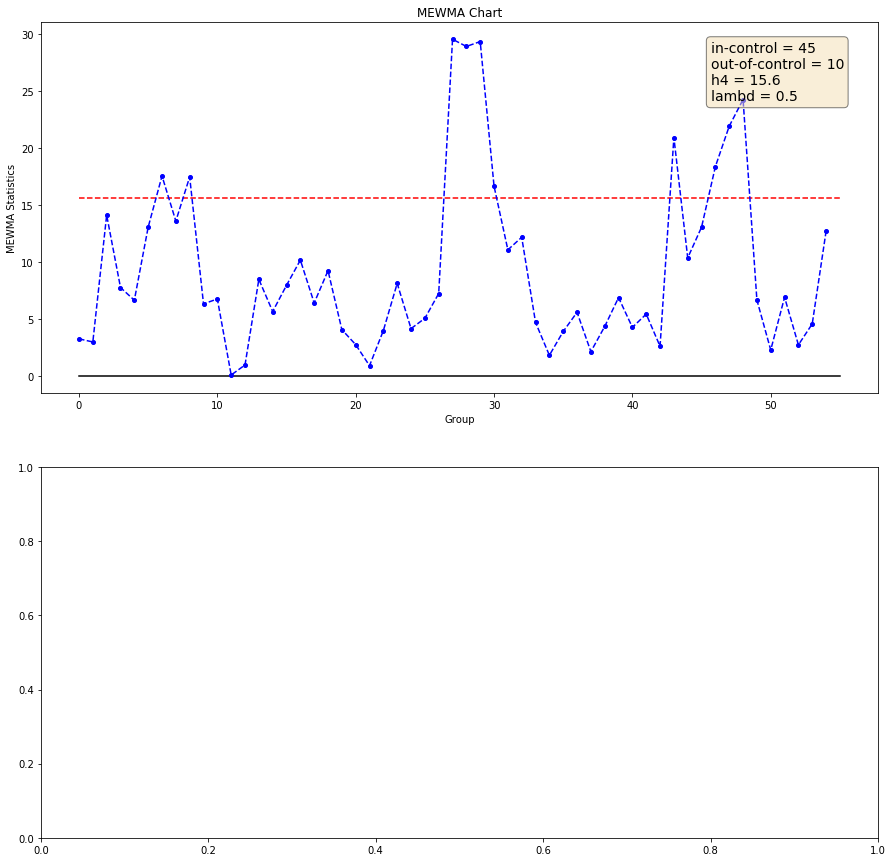

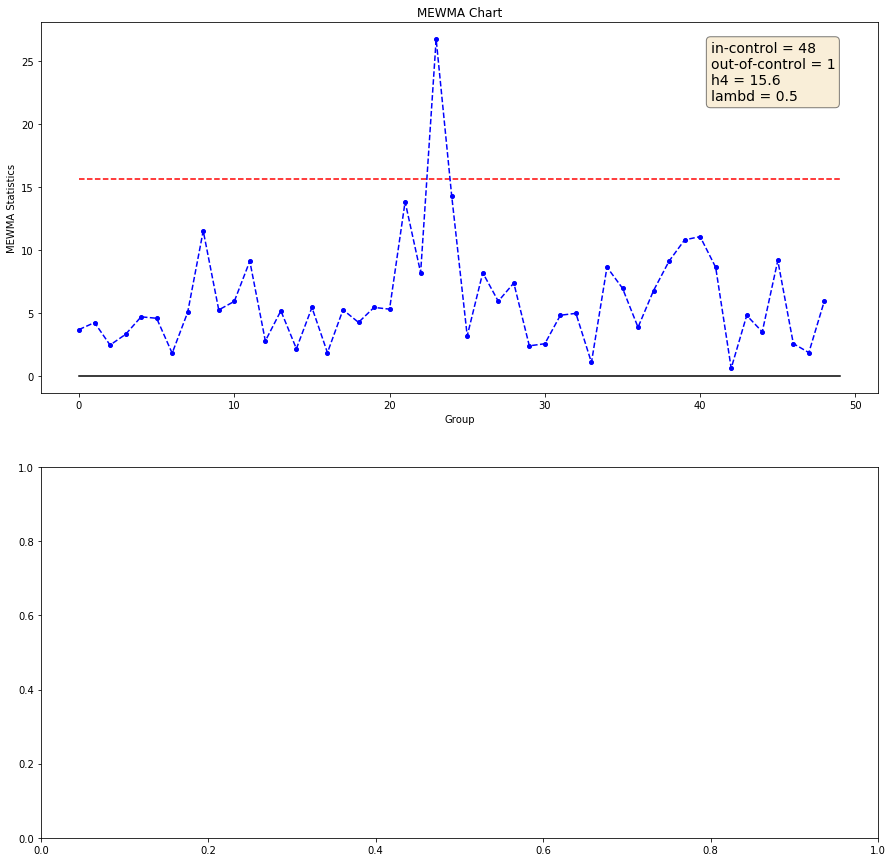

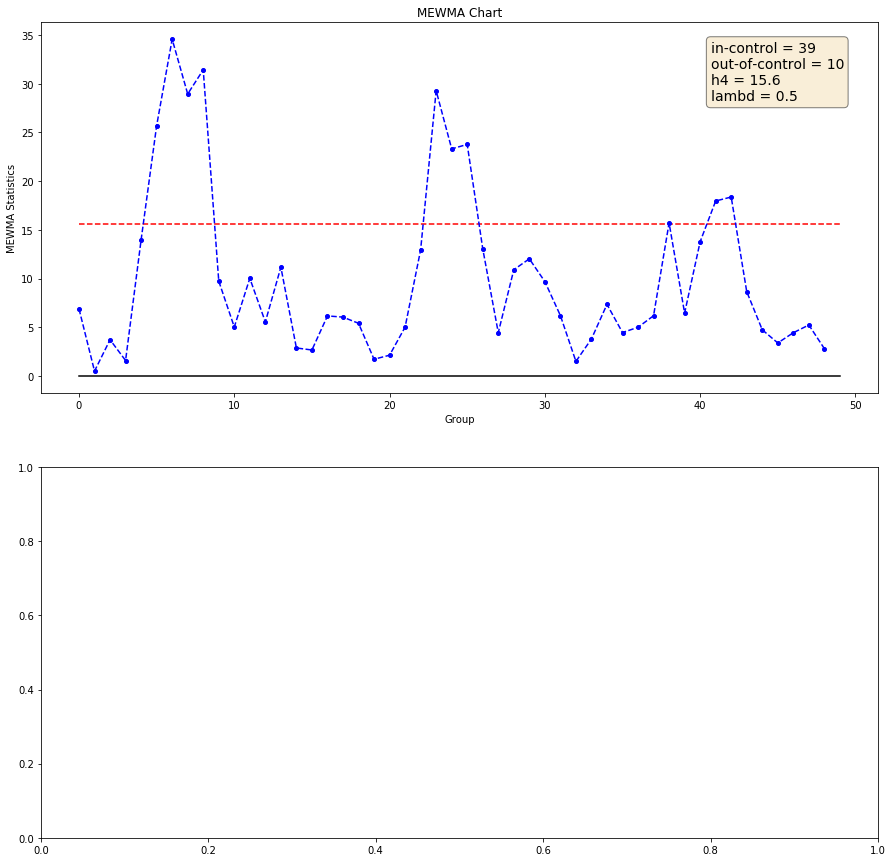

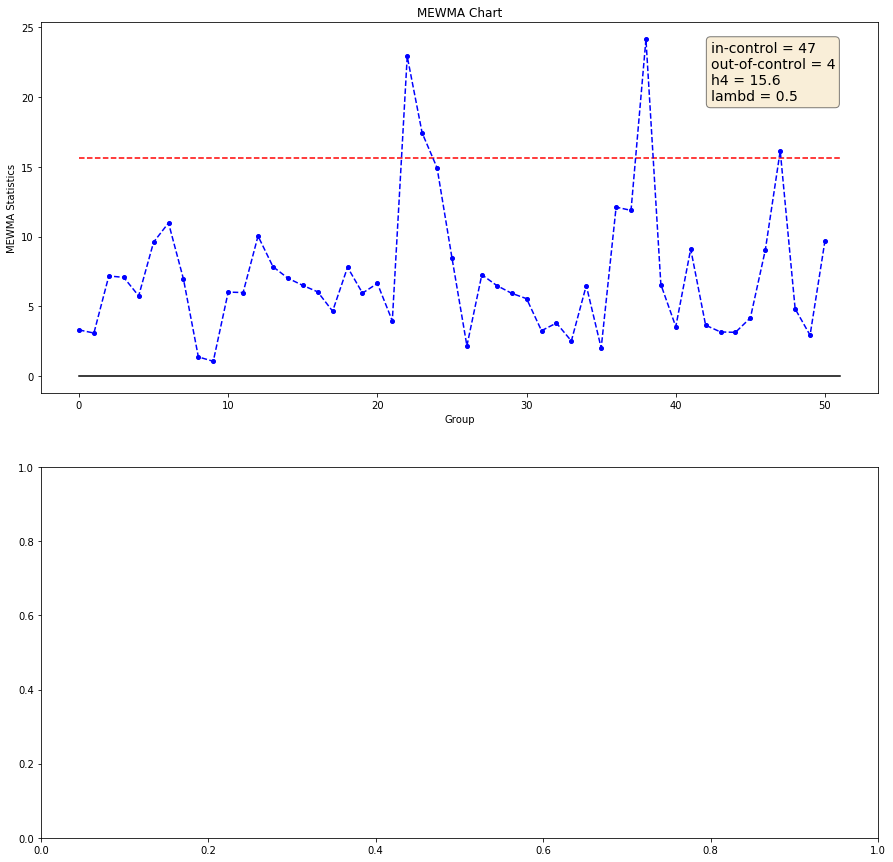

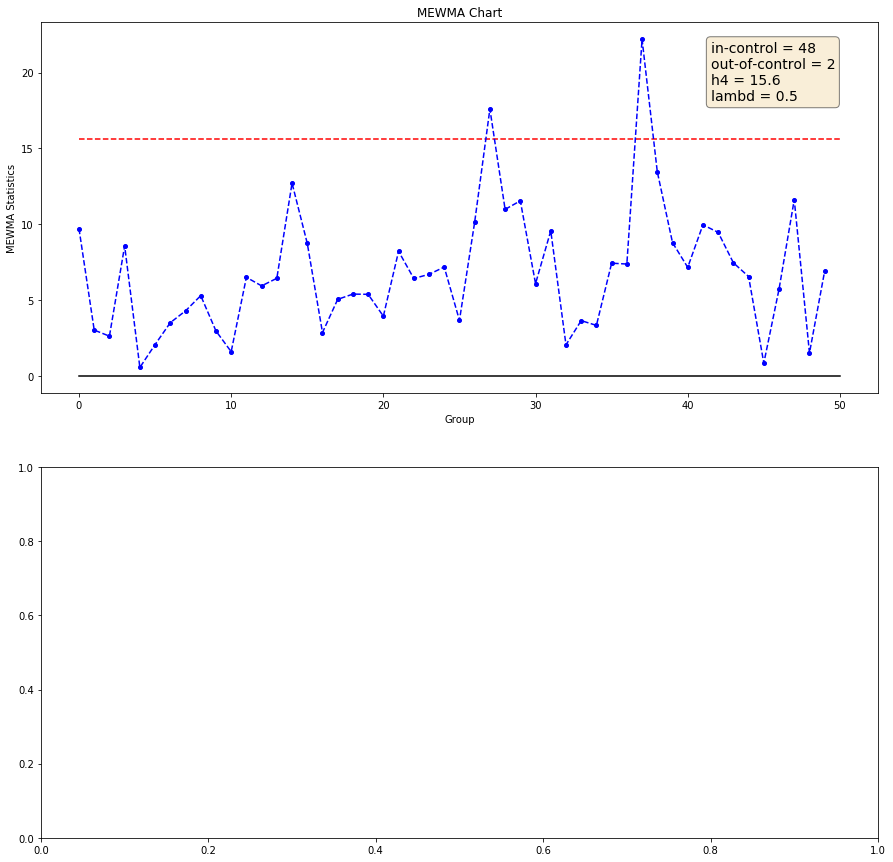

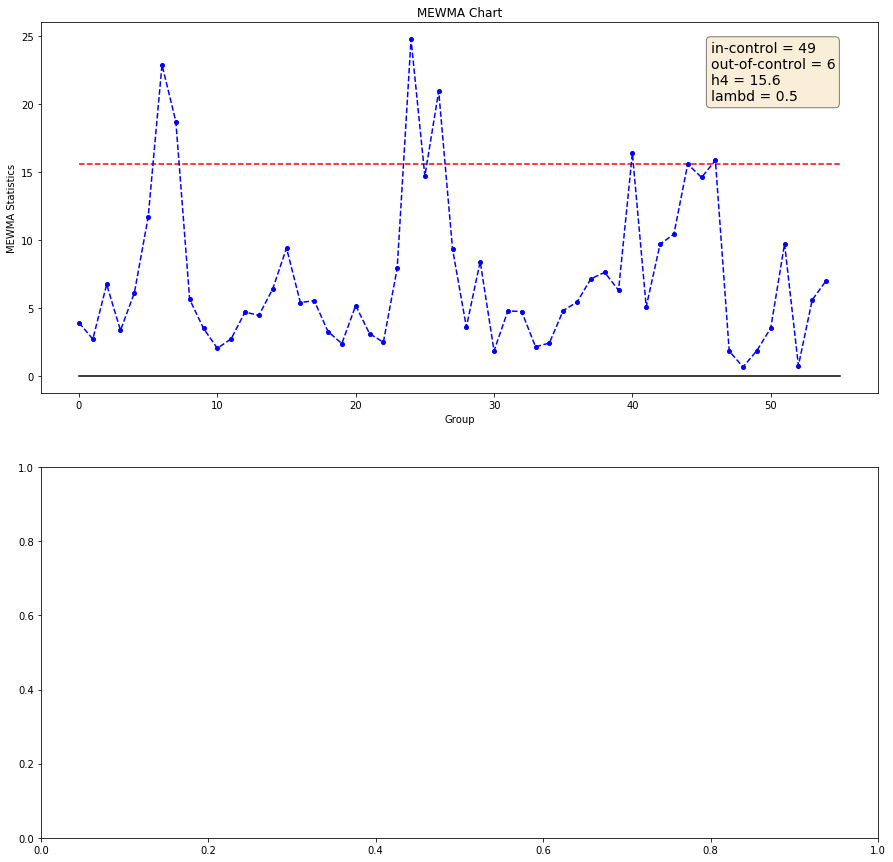

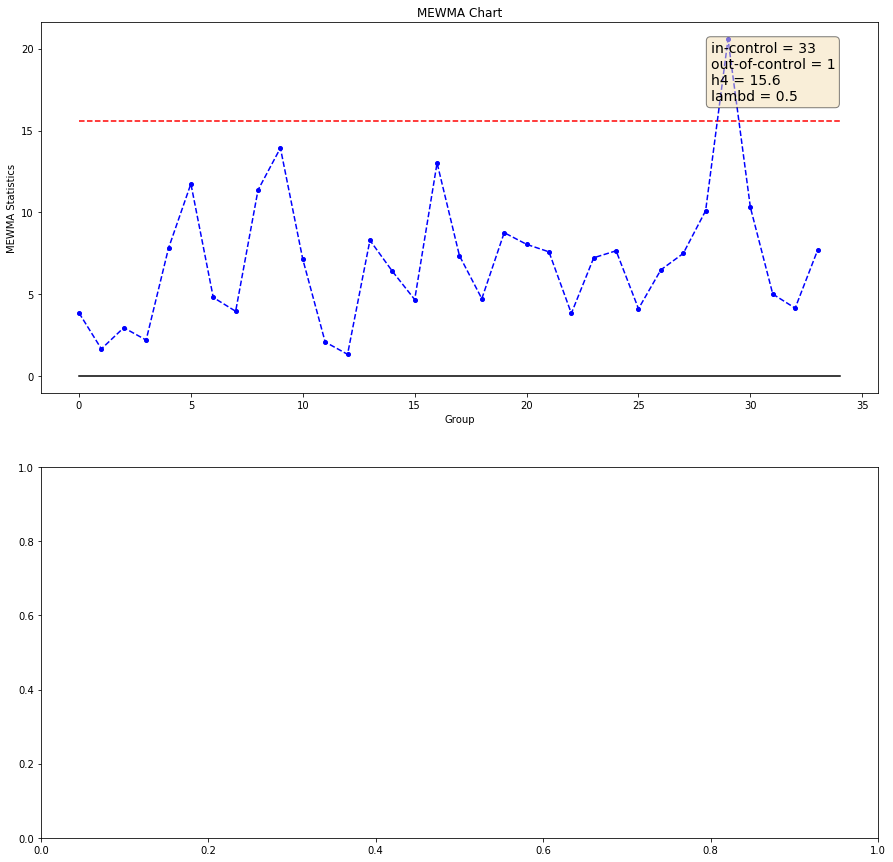

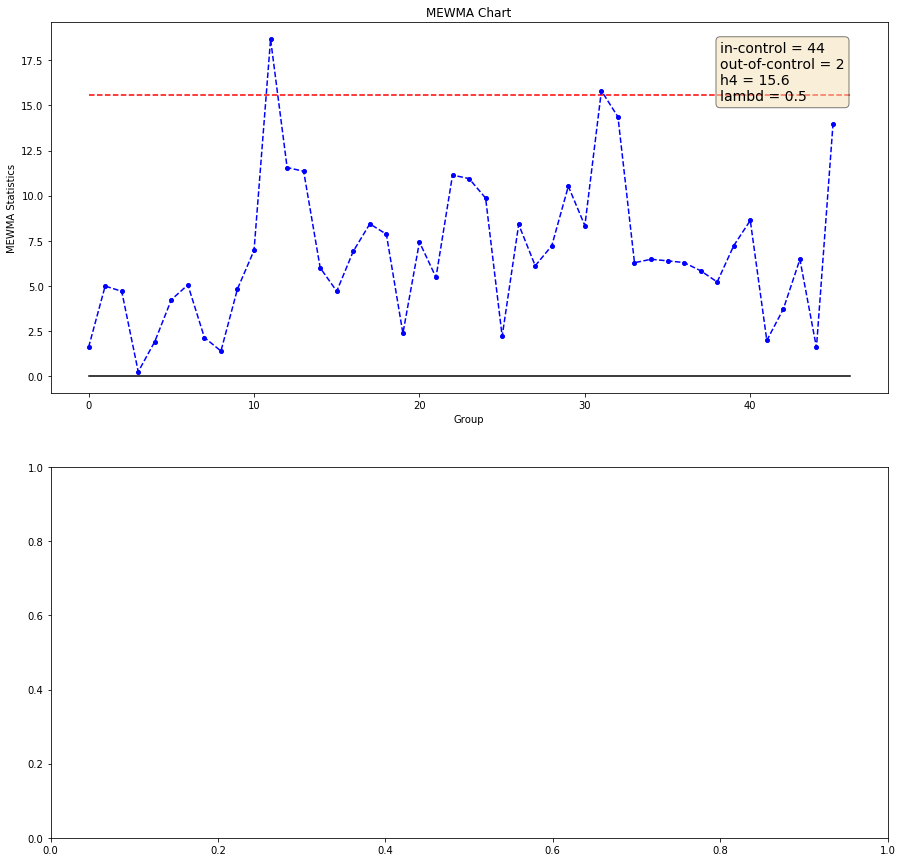

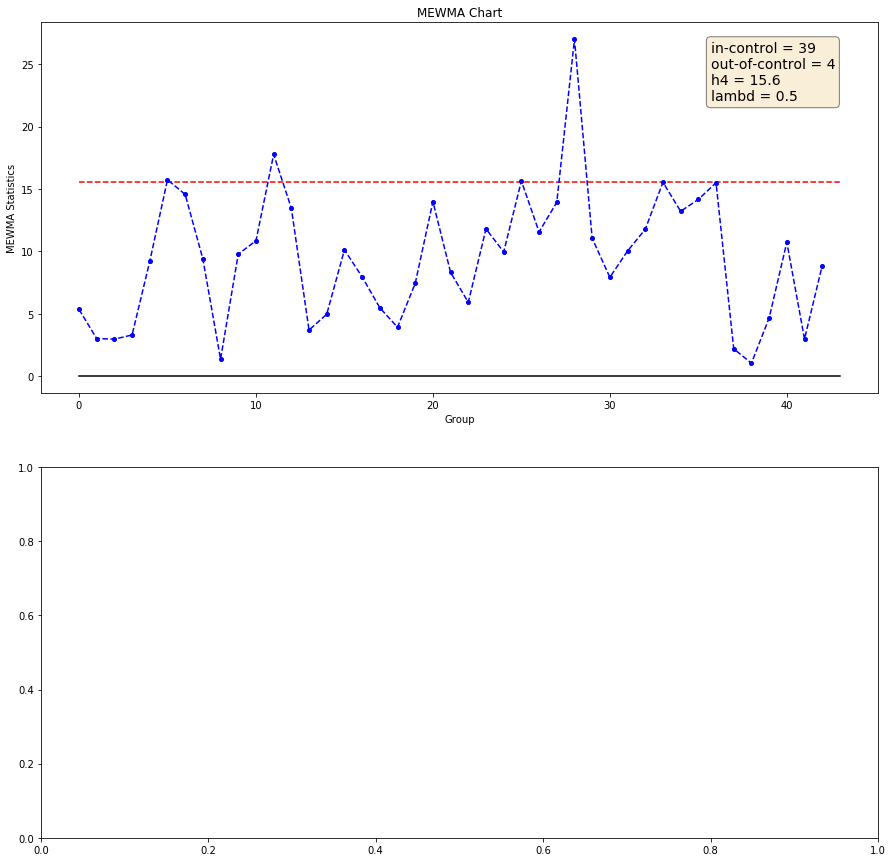

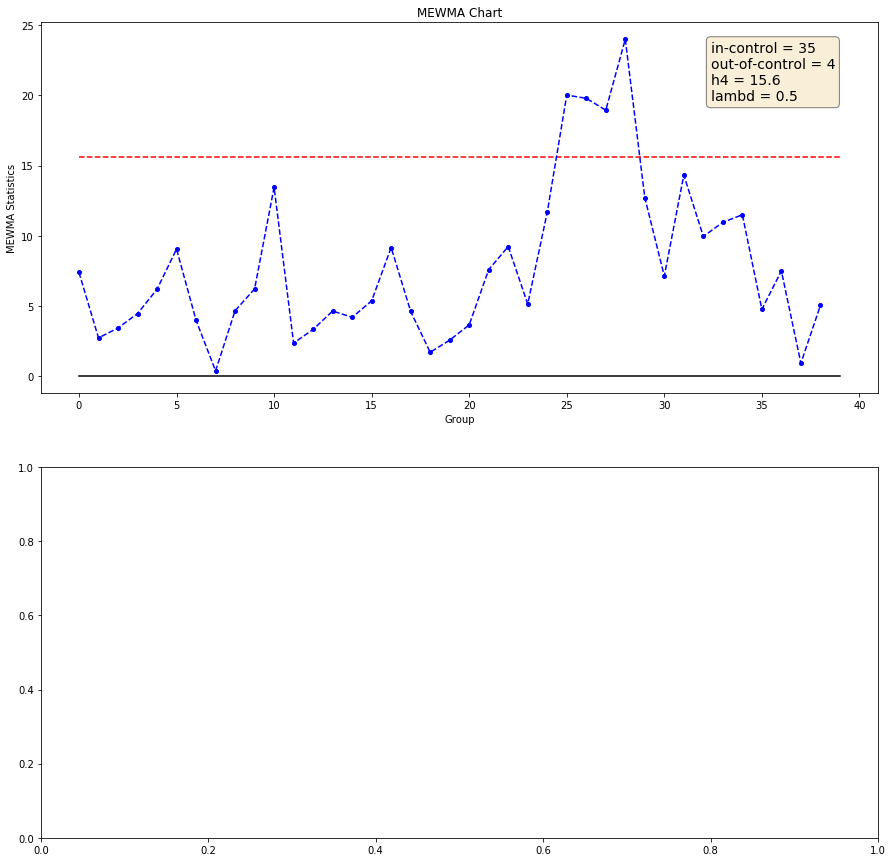

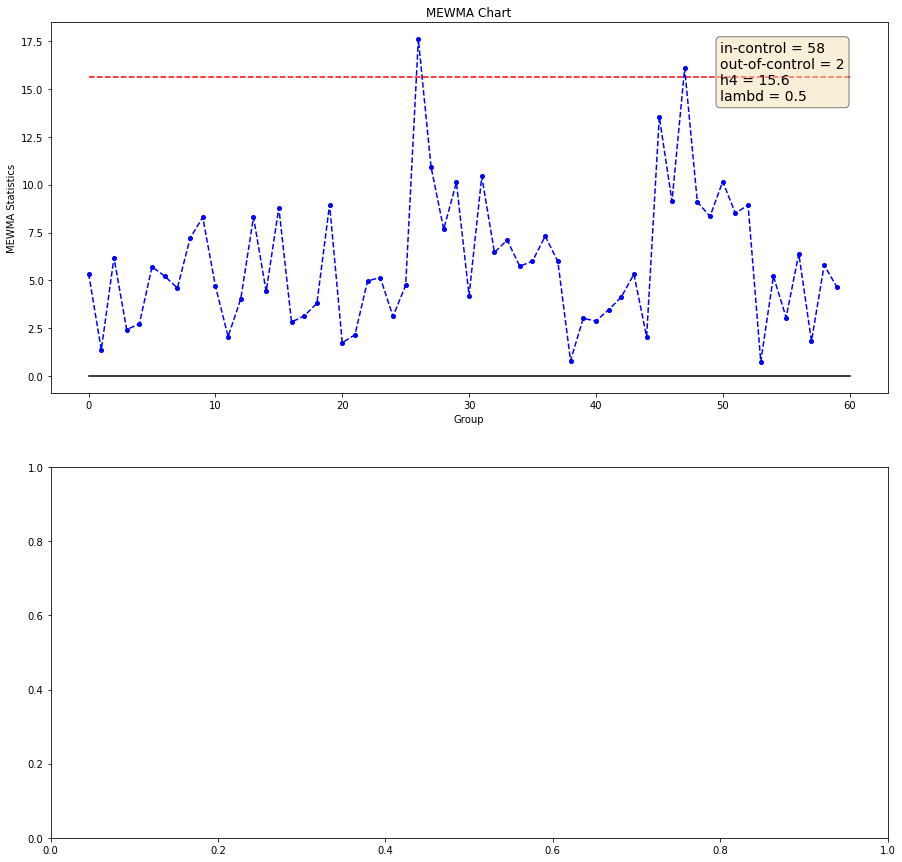

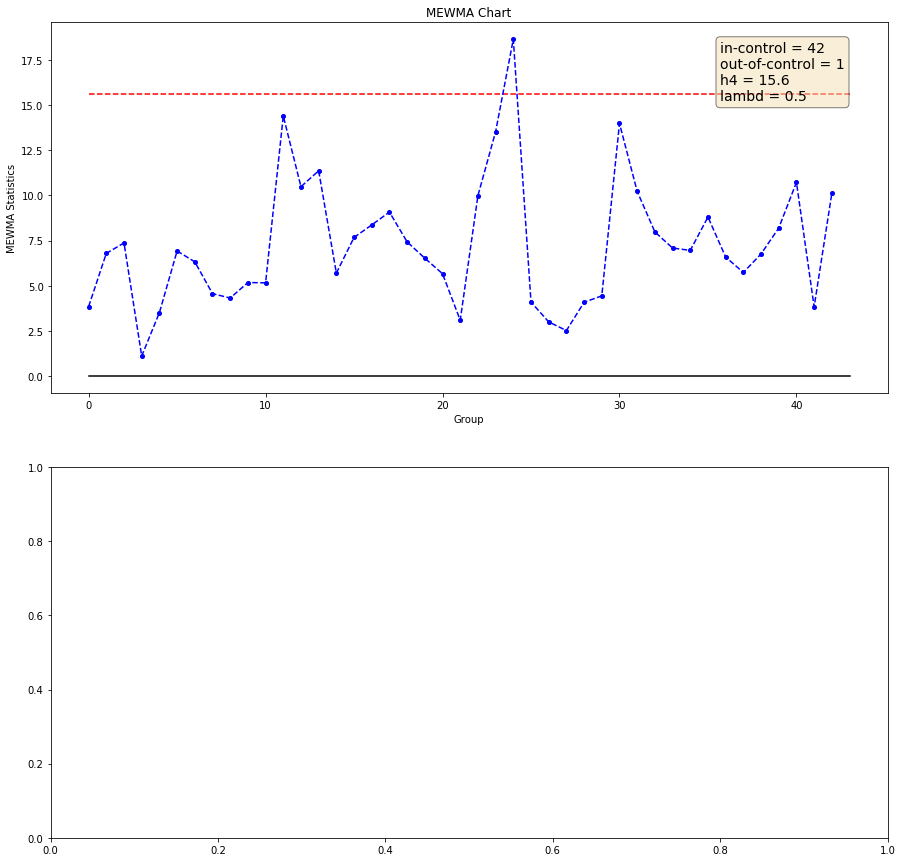

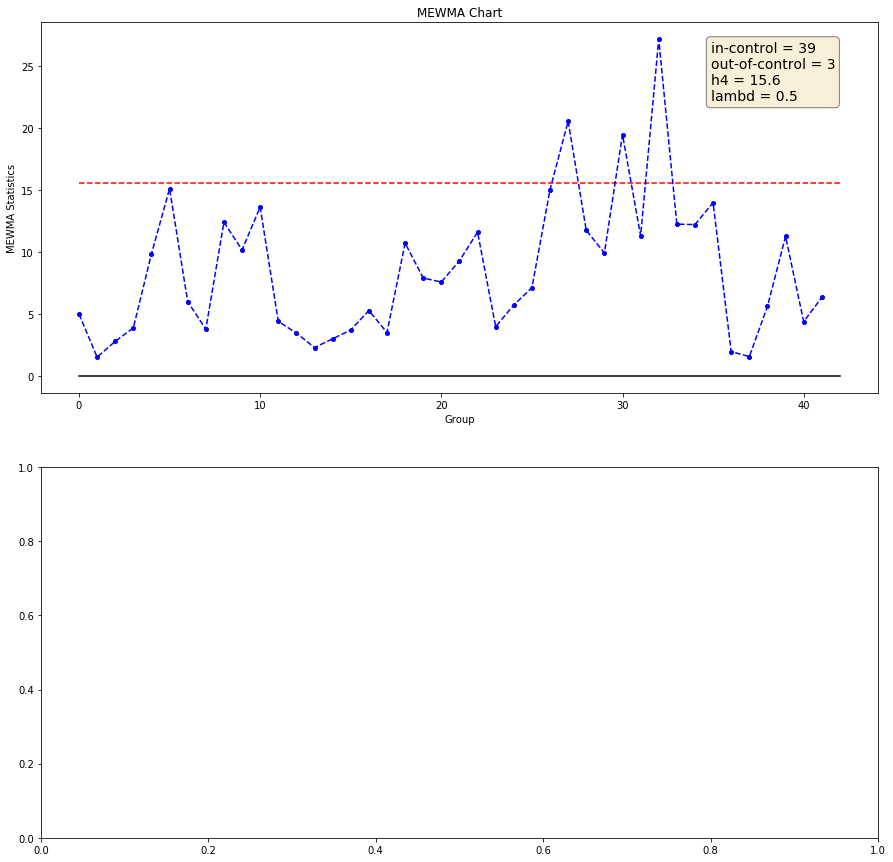

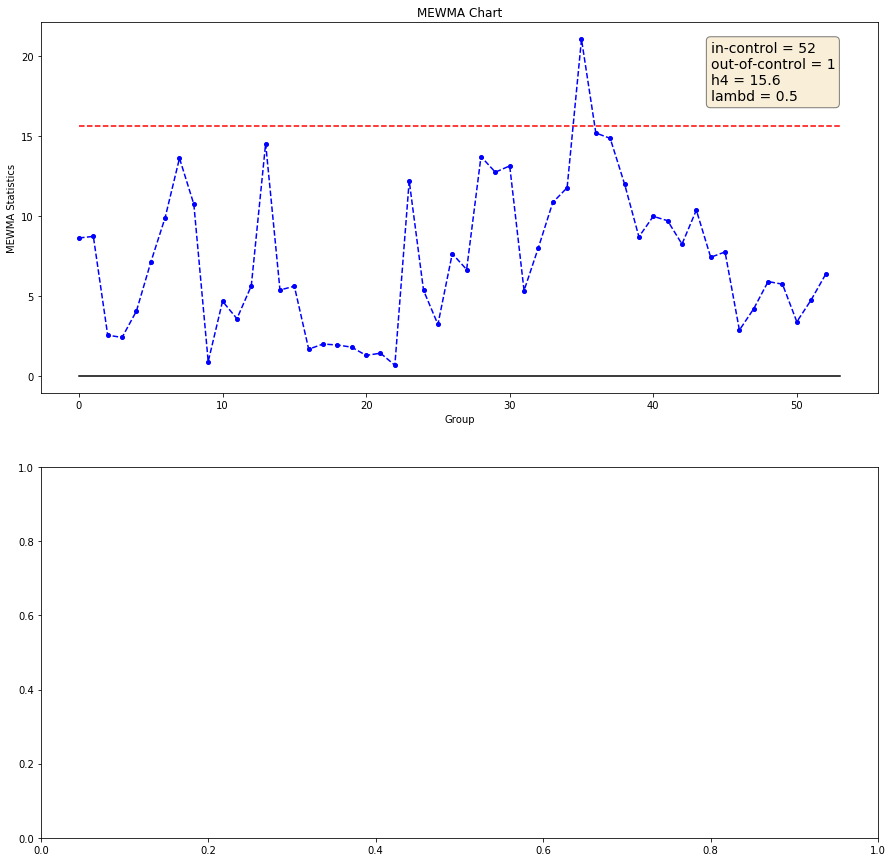

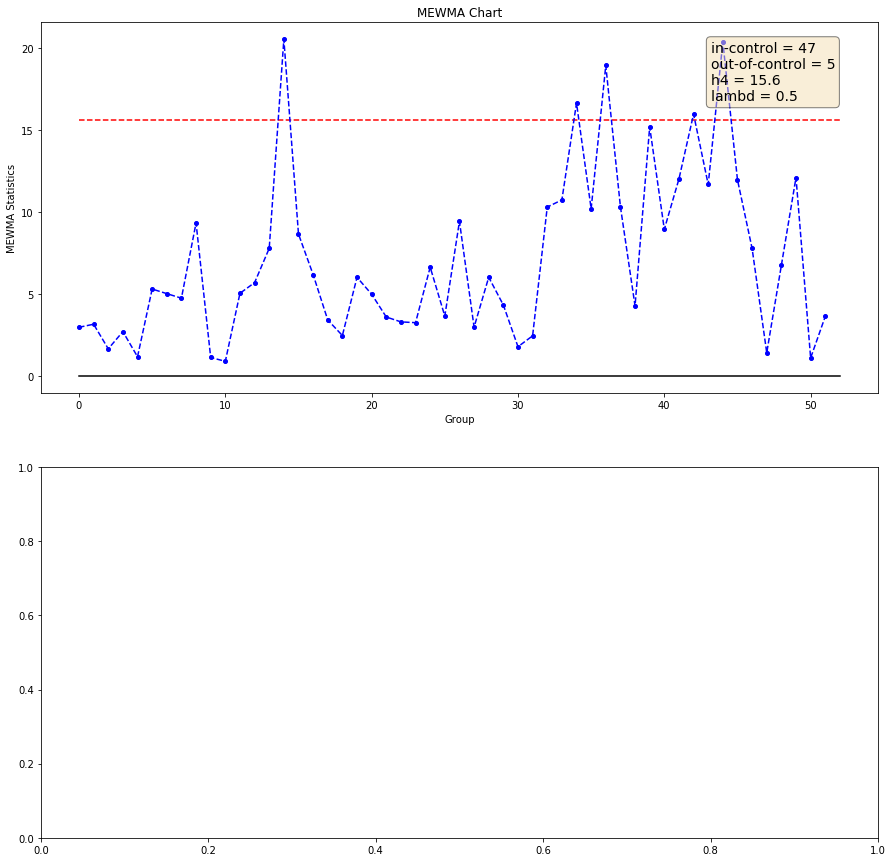

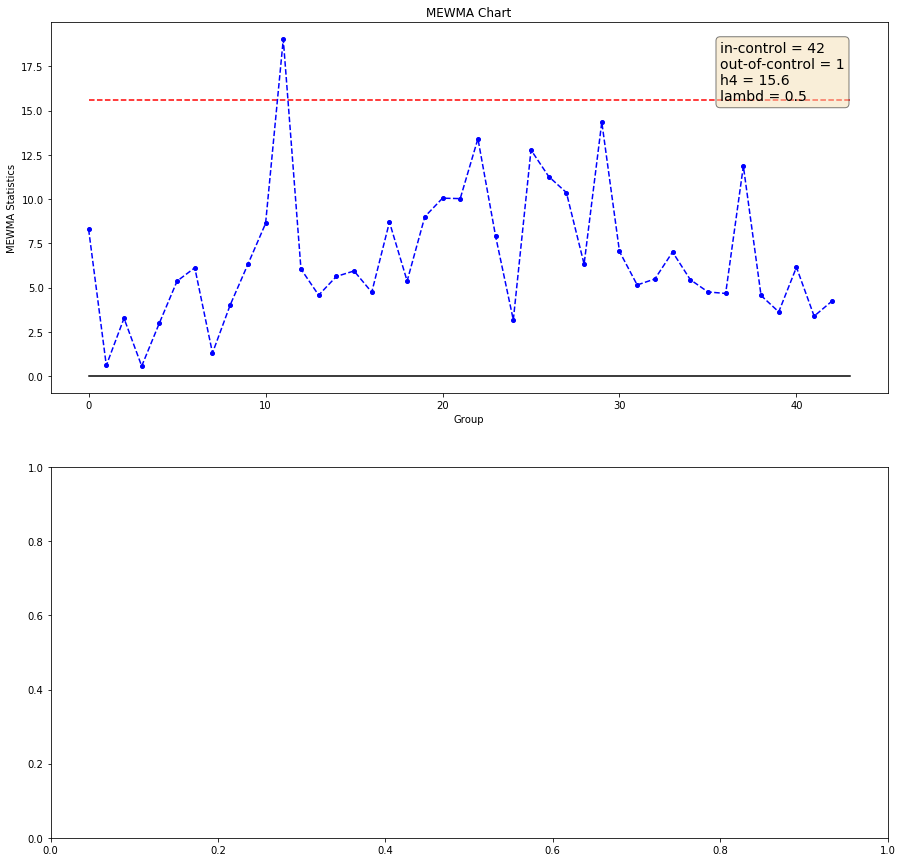

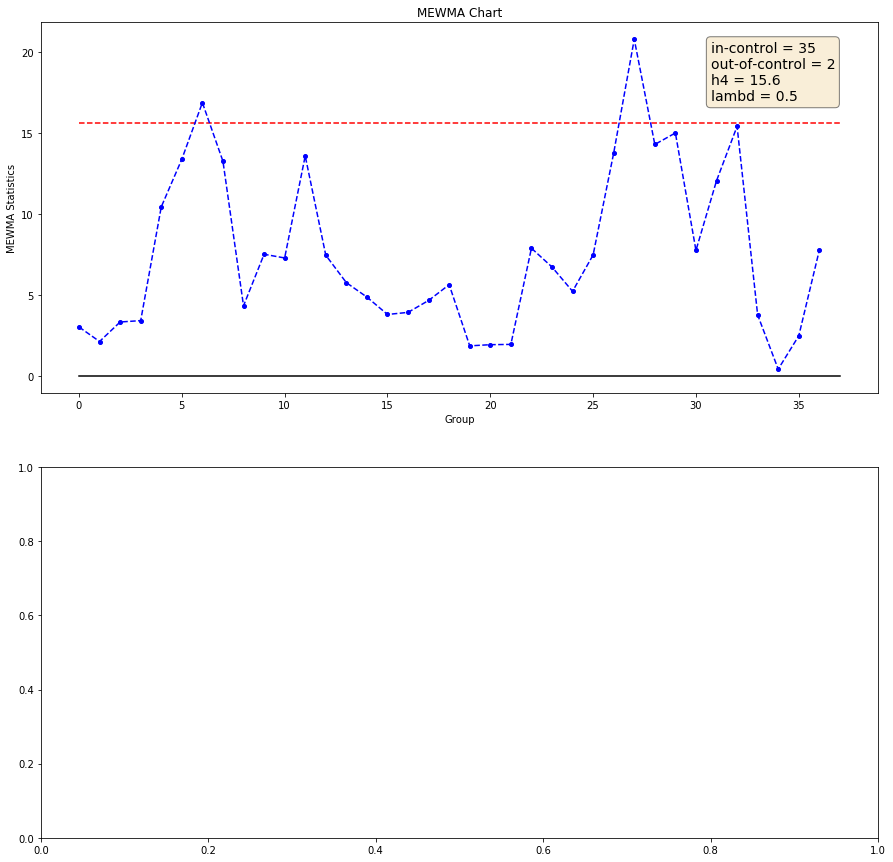

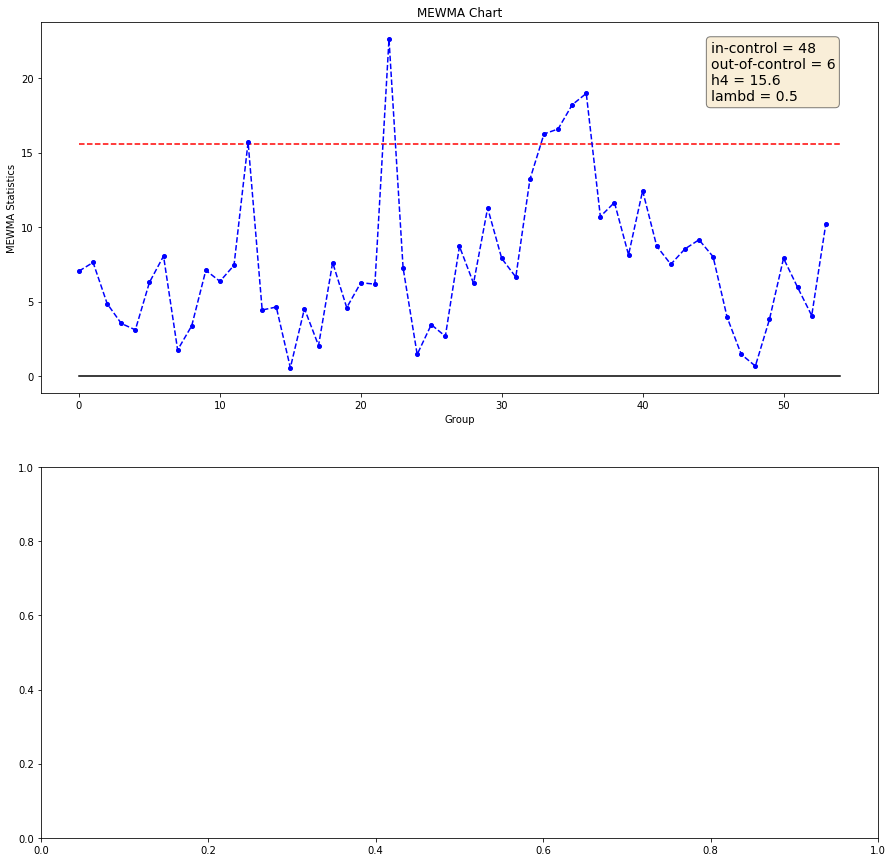

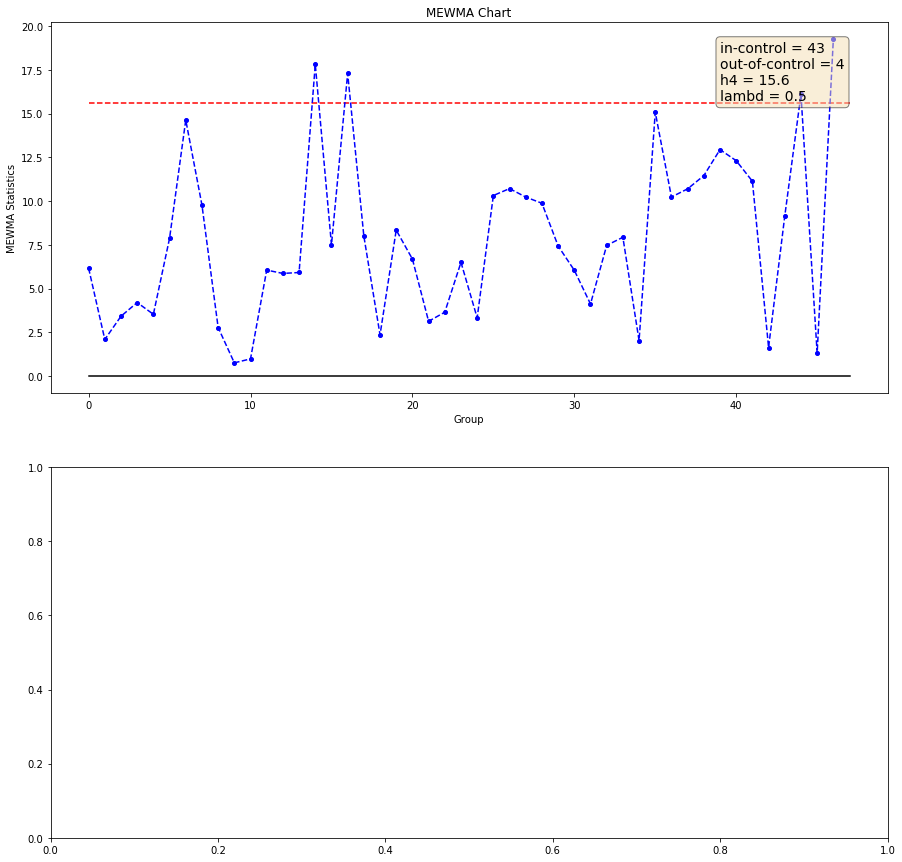

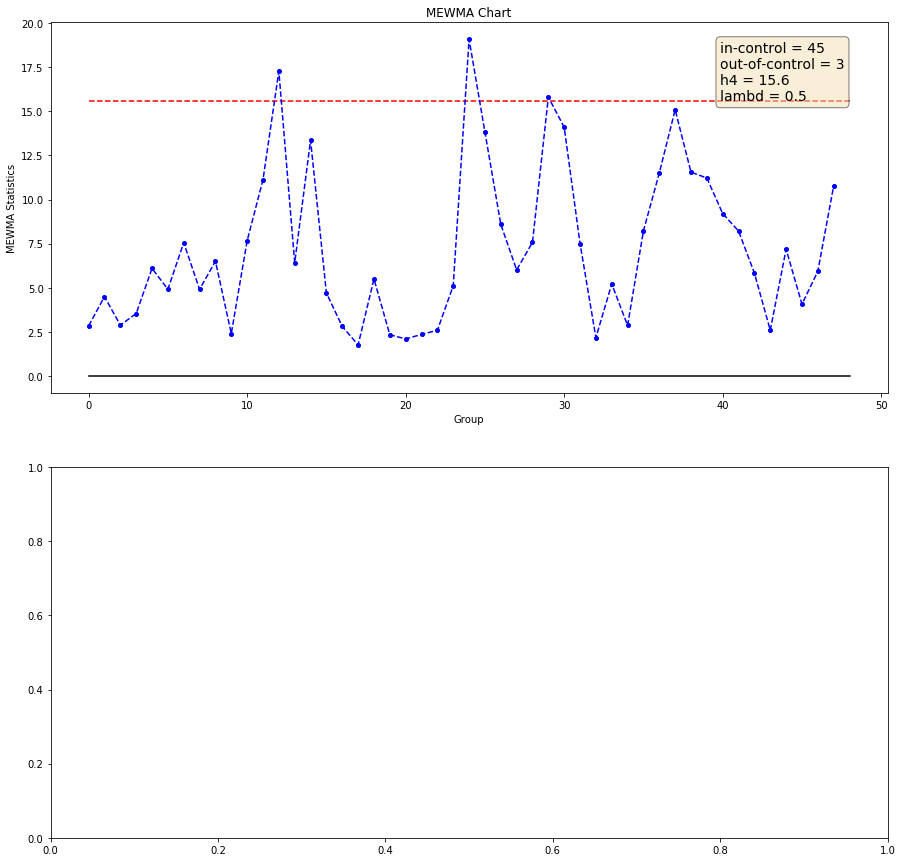

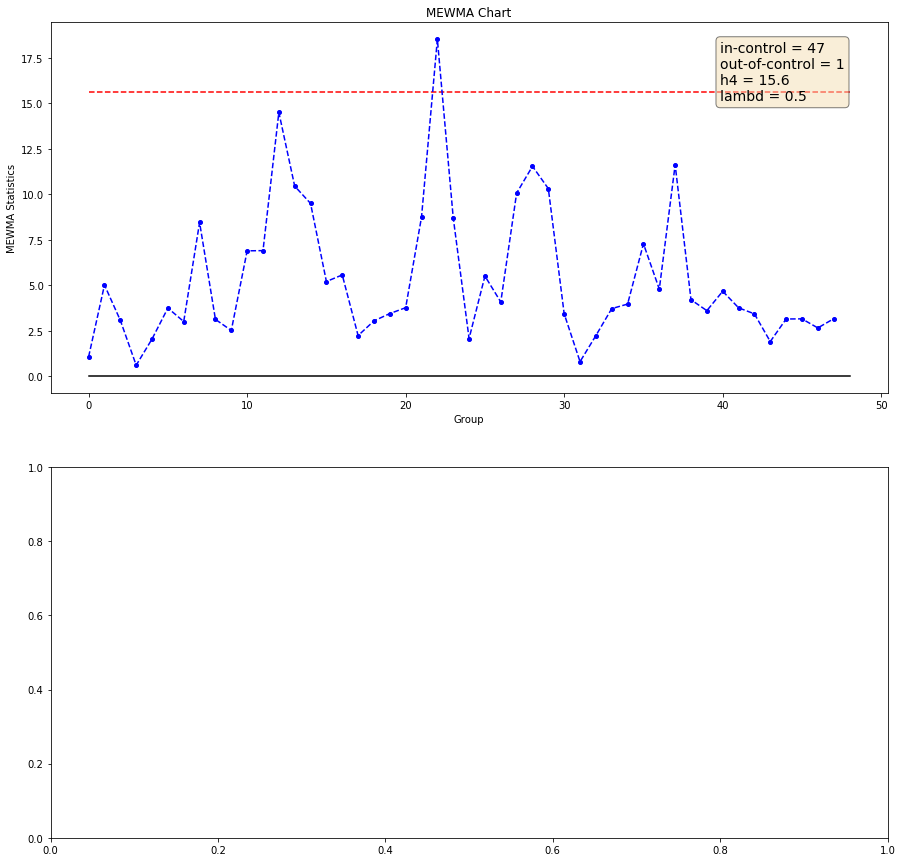

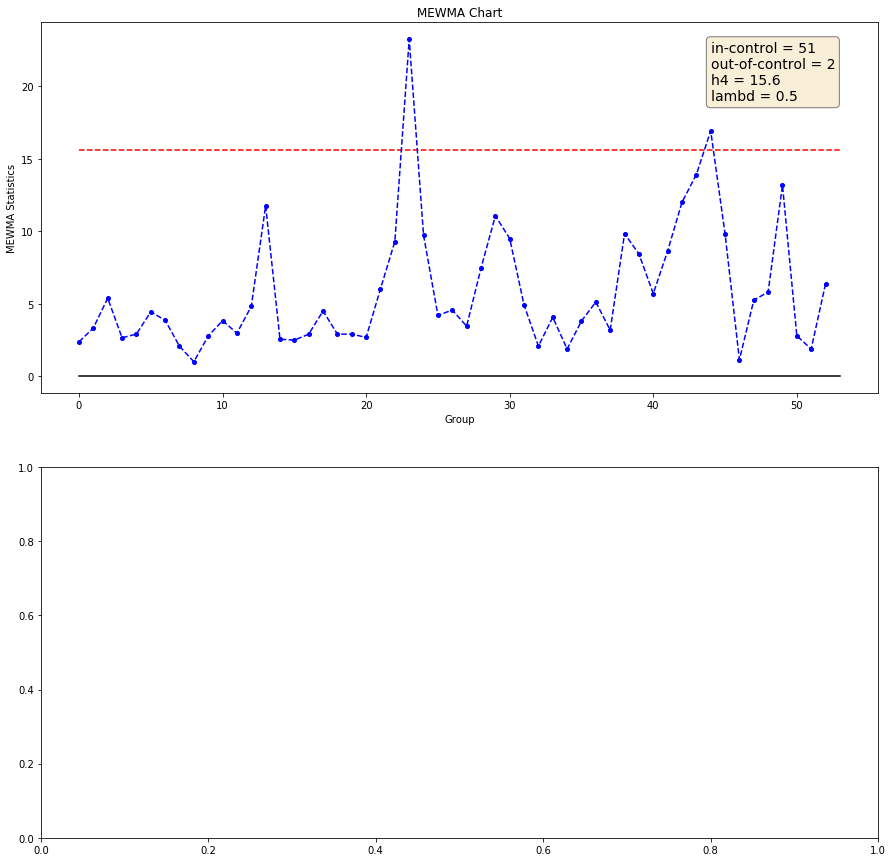

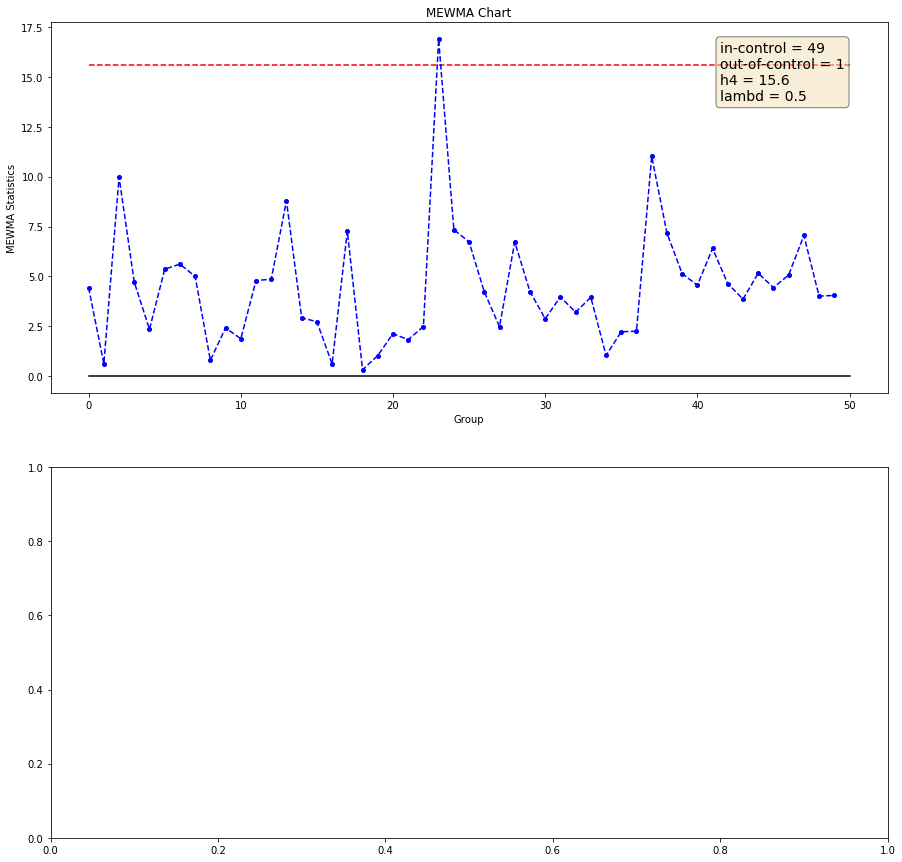

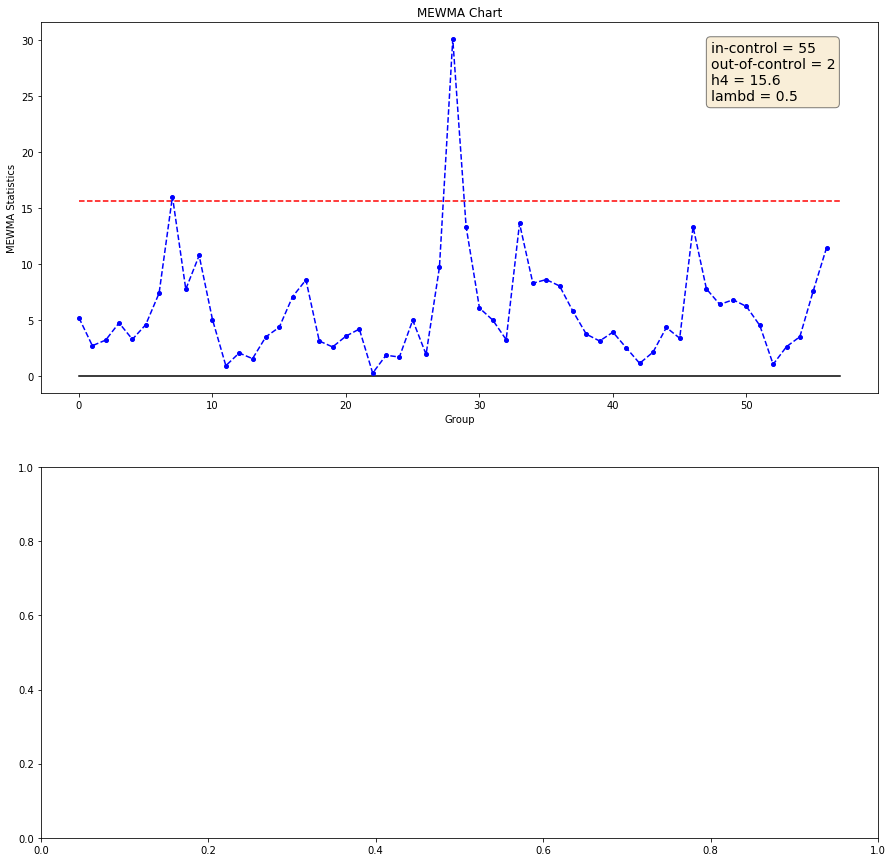

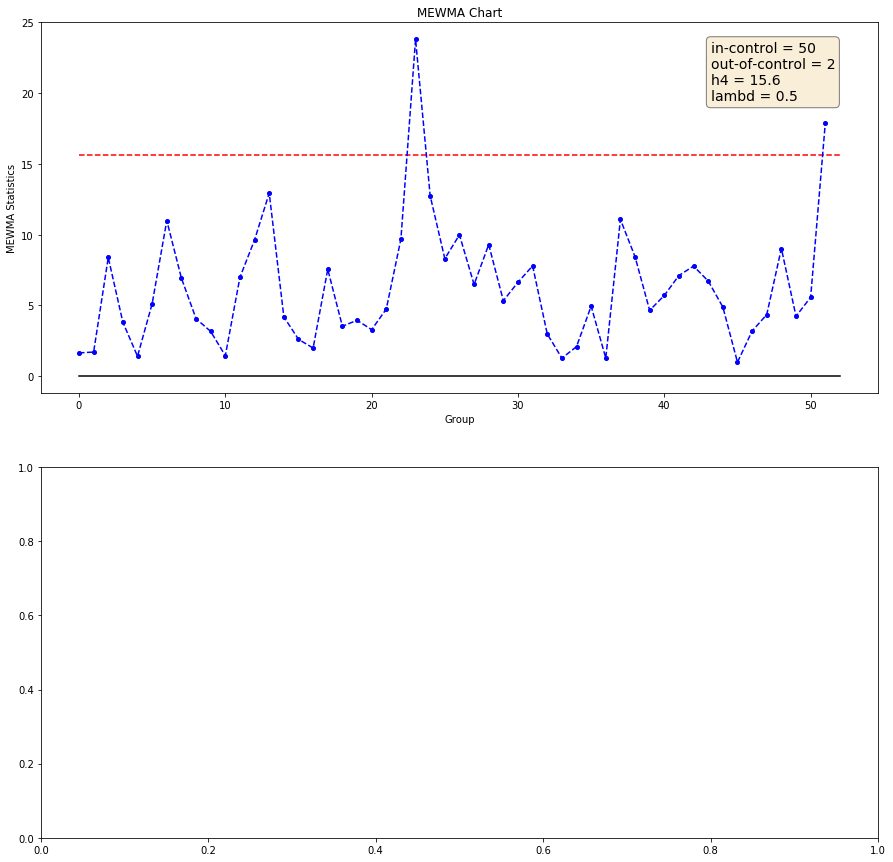

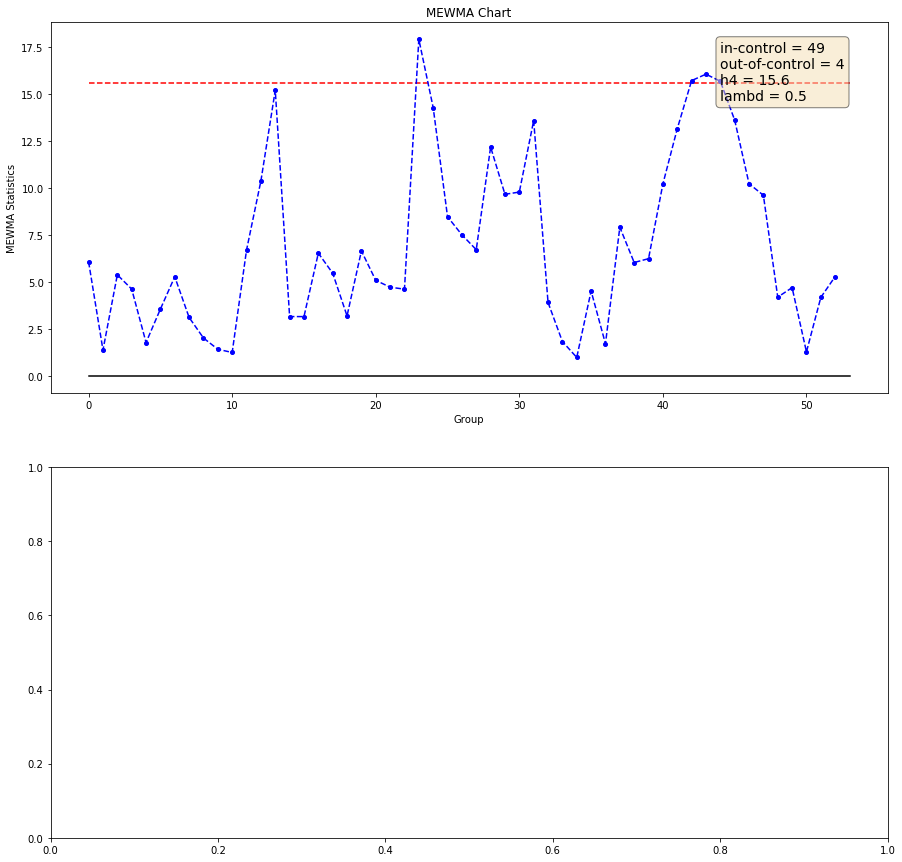

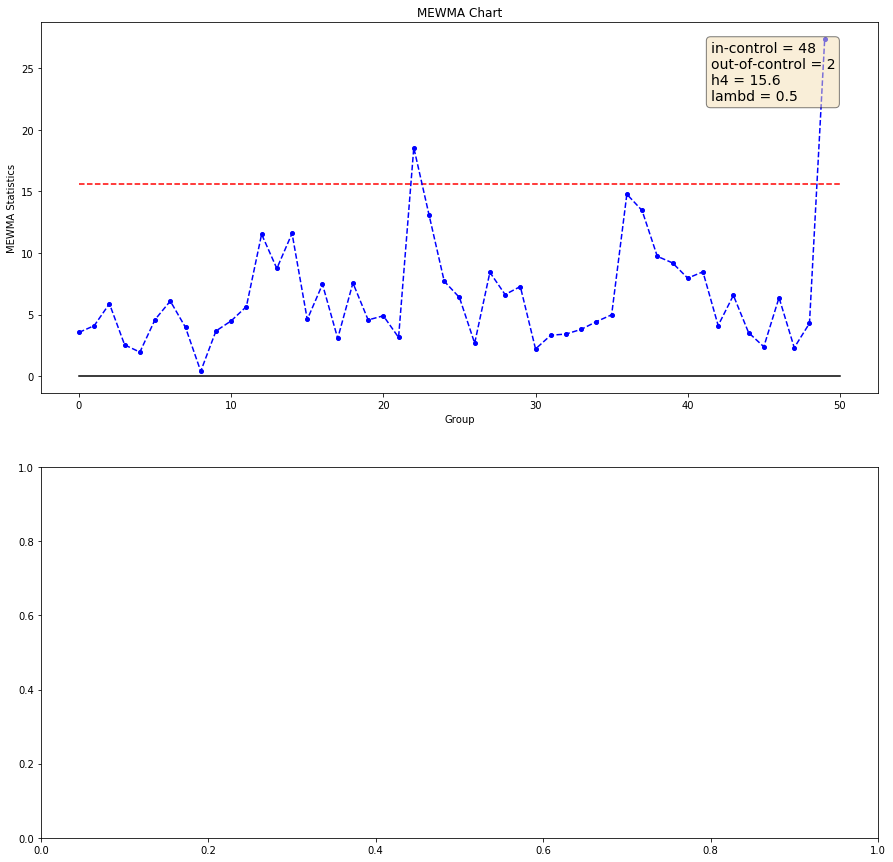

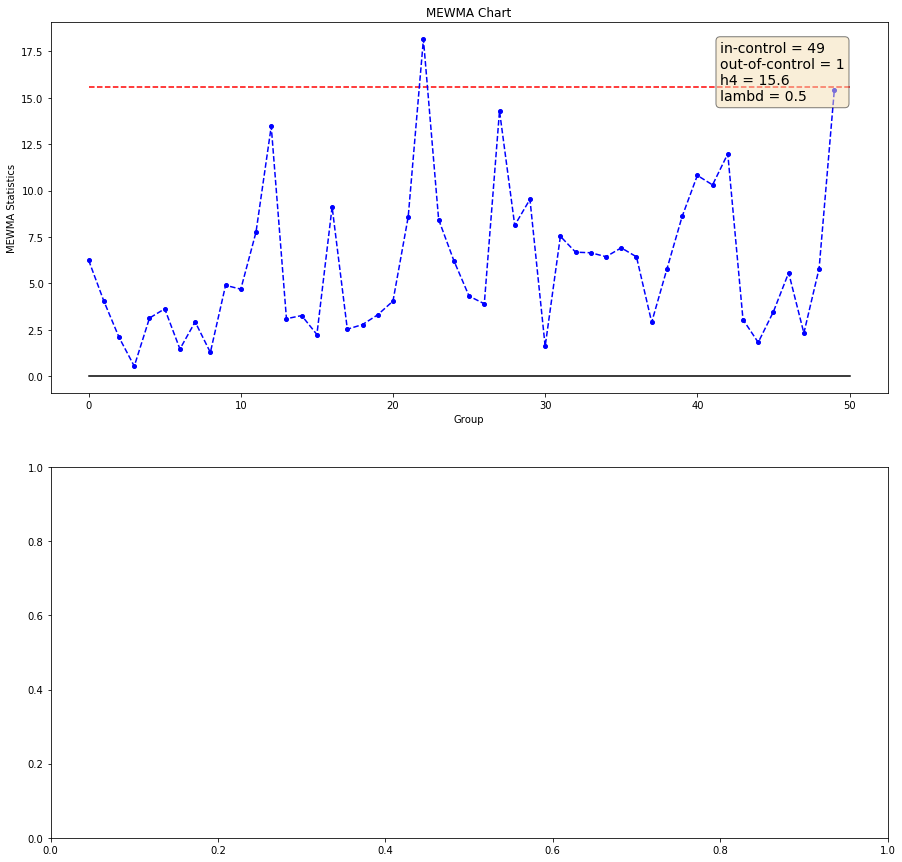

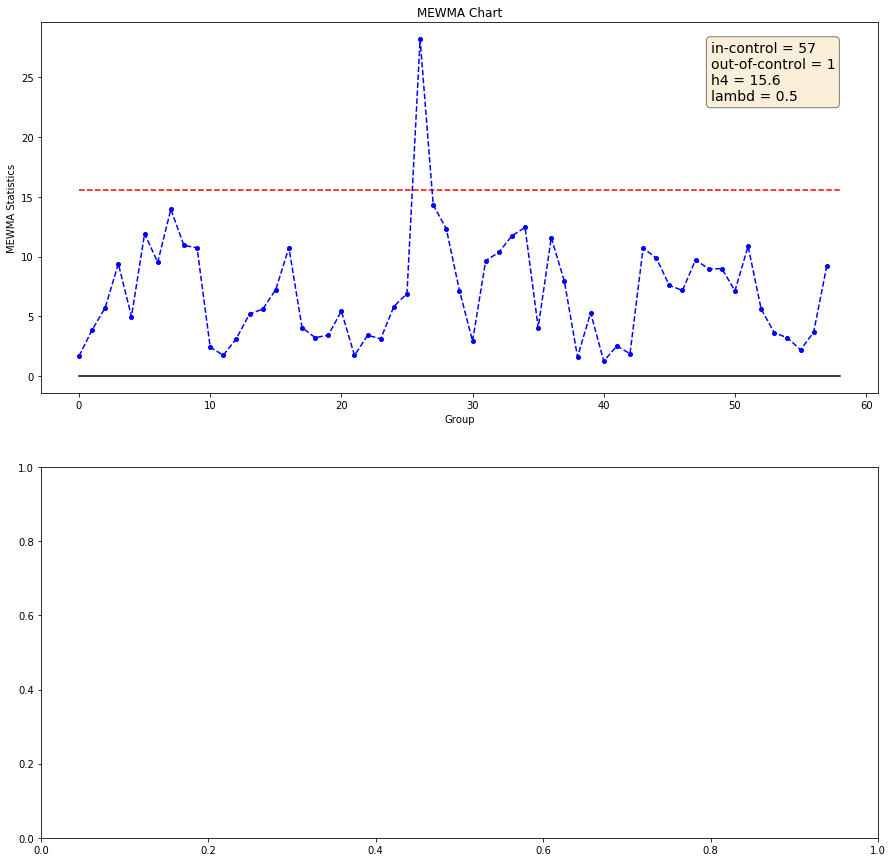

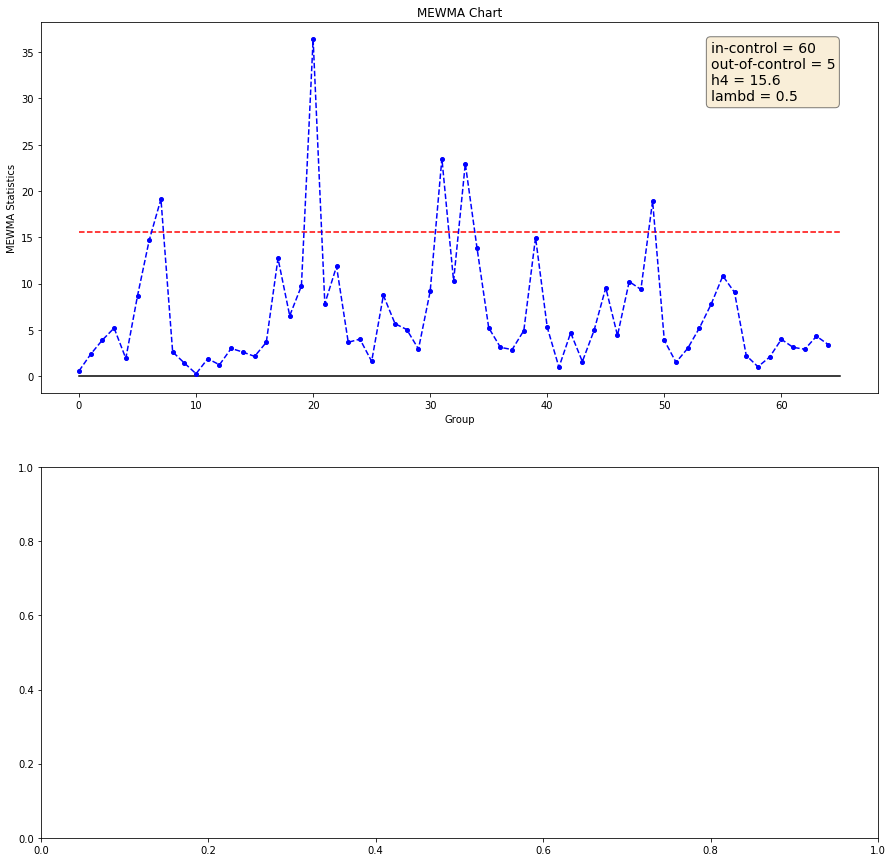

In [21]:
import numpy as np
colnames=['AIR101', 'AIR121pH', 'PIR112', 'TIR101','Z_AIR101','Z_AIR121pH','Z_PIR112','Z_TIR101','T2','Control','Phase']
Batch_Ids=Weighted_Mean_df.Batch.unique()
# Batch_Ids=list(Weighted_Mean_df[Weighted_Mean_df.index.isin(EWMA_OOC_ls)]['Batch'])
CV_ls=Zero_df.columns.drop(['Batch'])
Final_phase_ls=[]
Final_Batch_ls=[]
Phase_length_ls=[]
for batch in Batch_Ids:
    Currentblock_df=Zero_df.mask_one_equal('Batch',batch)[CV_ls].groupby(['CurrentBlock']).mean()
    print("Batch",batch)
    if(Currentblock_df.shape[0]>=10):

        EWMA_ls,complete_df,ucl,percent_df=mewma_new(Currentblock_df.values,lambd=0.5,newdata=None,h4=15.60)
        phase_df=pd.DataFrame(Currentblock_df.index)
        complete_df1=pd.concat([complete_df,phase_df], axis=1, ignore_index=True)
        complete_df1.columns = colnames
        print(complete_df1.to_string())
        print(ucl)
        if(len(EWMA_ls)==0):
            print("There are no Out Of Control Phase point")
            print("-------------------------------------------------------------")
        else:
            Final_Batch_ls.append(batch)
            test_df=Currentblock_df.reset_index()
            test_value=list(test_df[test_df.index.isin(EWMA_ls)]['CurrentBlock'])
            Phase_length_ls.append(len(test_value))
            Final_phase_ls.append(test_value)
            print("Out of Control Phase\n",test_value)
            print("-------------------------------------------------------------")

In [22]:
flat_list = [item for sublist in Final_phase_ls for item in sublist]
my_dict = {i:flat_list.count(i) for i in flat_list}
phase_length_dict=dict(zip(Final_Batch_ls, Phase_length_ls))
phase_length_dict=sorted(phase_length_dict.items(), key=lambda x: x[1], reverse=True)
Sample_no=list(Weighted_Mean_df[Weighted_Mean_df.Batch.isin(Final_Batch_ls)].index+1)
Batch_number_ls=list(Weighted_Mean_df[Weighted_Mean_df.Batch.isin(Final_Batch_ls)].index+1)
Sample_Number_dict=dict(zip(Batch_number_ls, Phase_length_ls))
phase_length_dict1=sorted(Sample_Number_dict.items(), key=lambda x: x[1], reverse=True)
Currentblock_df.reset_index()
print("Out Of Control Batch Number:\n",Final_Batch_ls)
print("--------------------------------------------------------------------------------------------------------------------")
print("Out Of Control Sample number:\n",Sample_no)
print("--------------------------------------------------------------------------------------------------------------------")
print("Out Of Control Sample Count:\n",len(Sample_no))
print("--------------------------------------------------------------------------------------------------------------------")
print("In Control Sample Count:\n",96-len(Sample_no))
print("--------------------------------------------------------------------------------------------------------------------")
print("Number of Phase Count of a Batch in a list\n",phase_length_dict)
print("--------------------------------------------------------------------------------------------------------------------")
print("Number of Phase Count of a Sample in a list\n",phase_length_dict1)
print("--------------------------------------------------------------------------------------------------------------------")
sorted(my_dict.items(), key=lambda x: x[1], reverse=True)

Out Of Control Batch Number:
 [899032.0, 899409.0, 899641.0, 900105.0, 900605.0, 900889.0, 901002.0, 901156.0, 901300.0, 901458.0, 901586.0, 901778.0, 901892.0, 902020.0, 902108.0, 902236.0, 902319.0, 902676.0, 902780.0, 903040.0, 903279.0, 905263.0, 905591.0, 905983.0, 906306.0, 906601.0, 906795.0, 907104.0, 907645.0, 920021.0]
--------------------------------------------------------------------------------------------------------------------
Out Of Control Sample number:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
--------------------------------------------------------------------------------------------------------------------
Out Of Control Sample Count:
 30
--------------------------------------------------------------------------------------------------------------------
In Control Sample Count:
 66
-----------------------------------------------------------------------------------------------------------------

[('GUANIDINE_RECIRCULATION', 17),
 ('RECIRCULATION_GUANIDINE', 8),
 ('END_ELUATE_COLLECTION', 7),
 ('Pre_use_Rinse_column_tubing', 7),
 ('CLEAN_OUTLET', 5),
 ('Guanidine_Prime_Post_Use', 5),
 ('STORAGE_OUTLET', 5),
 ('RECIRCULATION_PREP_NAOH', 4),
 ('CLEAN_FILTER', 3),
 ('Guanidine_HCl_Rinse', 3),
 ('CLEAN_INLET', 3),
 ('Pre_use_Rinse_Inlet', 3),
 ('column_Storage_Post_Use', 3),
 ('STORAGE_AIRTRAP', 2),
 ('Skid_store', 2),
 ('Pre_use_Rinse_Outlet', 2),
 ('STORAGE_INLET', 2),
 ('Guanidine_Rinse_Post_Use', 1),
 ('STORAGE_COLUMN_TUBING', 1),
 ('CLEAN_COLUMN_TUBING', 1),
 ('STORAGE_RECIRCULATION_VALVE', 1),
 ('MOCK_ELUTION', 1),
 ('Pre_use_Rinse_Filter', 1),
 ('PROCESS_SETUP', 1),
 ('Pre_use_Skid_Rinse', 1),
 ('EQUILIBRATION_3_CV', 1),
 ('ELUATE_COLLECTION', 1),
 ('LOADING', 1),
 ('STORAGE_FILTER', 1)]

## Clustering

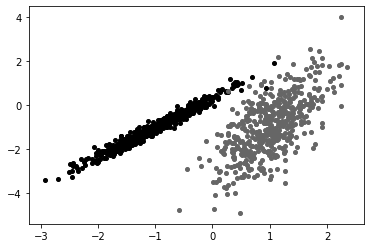

In [52]:

# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

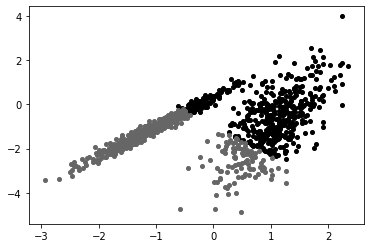

In [56]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
# X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

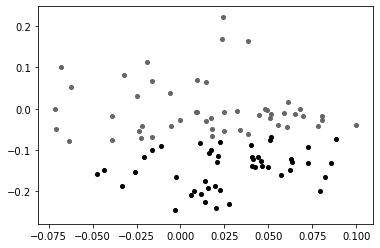

In [58]:
nobatch=['AIR101', 'AIR121pH', 'PIR112', 'TIR101']

Final_cluster_df=Weighted_Mean_df[nobatch].values

model = KMeans(n_clusters=2)
# fit the model
model.fit(Final_cluster_df)
# assign a cluster to each example
yhat = model.predict(Final_cluster_df)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(Final_cluster_df[row_ix, 0], Final_cluster_df[row_ix, 1])
# show the plot
pyplot.show()

In [23]:
phase_wise_ls=sorted(my_dict.items(), key=lambda x: x[1], reverse=True)
phase_wise_excel = pd.DataFrame(phase_wise_ls, columns=['Phase', 'Number of OOC'])
writer = pd.ExcelWriter("phase_wise_excel.xlsx", engine='xlsxwriter')
phase_wise_excel.to_excel(writer, "Describe")
writer.save()

In [ ]:
# def cova(mat):

#     l, _ = mat.shape
#     for i in range(1, l):
#         cov = np.hstack((np.array([]), mat.diagonal(i)))
#     return cov


# def var_cov(var, s):

#     varmean = var.mean(axis=0)
#     smean = s.mean(axis=0)
#     n = len(varmean)
#     mat = np.zeros(shape=(n, n)) + np.diag(varmean)

#     a, b = 0, n - 1
#     for i in range(1, n):
#         mat = mat + np.diag(smean[a:b], k=i) + np.diag(smean[a:b], k=-i)
#         a, b = b, (b + (b - 1))

#     return mat

In [ ]:
# samples=dict()
# samples[1.2]=np.array([5,4,3,3])
# samples[1.4]=np.array([6,4,3,3])
# list(samples.values())[0]
# n = len(list(samples[1]))

In [ ]:
# colnames=['AIR101', 'AIR121pH', 'PIR112', 'TIR101','Z_AIR101','Z_AIR121pH','Z_PIR112','Z_TIR101','T2','Control']
# def TSquare(data, newdata=None,col_names_ls=colnames):

#     sizes = data[:, 0]
#     sample = data[:, 1:]

#     actual_df = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1],'Colum3':data[:,2],'Colum4':data[:,3]})

#     samples = dict()
#     for n, value in zip(sizes, sample):
#         if n in samples:
#             samples[n] = np.vstack([samples[n], value])
#         else:
#             samples[n] = value
#     print(samples)
#     m = len(samples.keys())
#     n = len(list(samples.values())[1])
#     p = len(list(samples.values())[1].T)

#     variance, S = [], []
#     for i in range(m):
#         mat = np.cov(list(samples.values())[i + 1].T, ddof=1)
#         variance.append(mat.diagonal())
#         S.append(cova(mat))

#     variance, S = np.array(variance), np.array(S)

#     means = np.array([samples[xs + 1].mean(axis=0) for xs in range(m)])
#     means_total = means.mean(axis=0)

#     Smat = var_cov(variance, S)
#     Smat_inv = np.linalg.inv(Smat)


#     p1 = (p * (m - 1) * (n - 1))
#     p2 = (m * n - m - p + 1)
#     lcl = (p1 / p2) * f.ppf(0.00135, p, p2)
#     center = (p1 / p2) * f.ppf(0.50, p, p2)
#     ucl = (p1 / p2) * f.ppf(0.99865, p, p2)

#     values = []
#     ptr=0
#     T2_ls=[]
#     In_Out_ls=[]
#     for i in range(m):
#         a = means[i] - means_total
#         values.append(5 * a @ Smat_inv @ a.T)
#         if(values[i]>ucl or values[i]<lcl):
#             T2_ls.append(ptr)
#             In_Out_ls.append("OOC")
#         else:
#             In_Out_ls.append("IN")
#             ptr=ptr+1

#     In_Out_df=pd.DataFrame(In_Out_ls)

#     Values_df=pd.DataFrame(values)

#     complete_df=pd.concat([actual_df,Values_df,In_Out_df], axis=1, ignore_index=True)
#     complete_df.columns = col_names_ls

#     fig, axs = plt.subplots(2, figsize=(15,15))
#     axs[0].plot([0, len(values)], [0,0], 'k-')
#     axs[0].plot([0, len(values)], [ucl, ucl], 'r:', color='red', linestyle='dashed')
#     axs[0].plot([0, len(values)], [lcl, lcl], 'r:', color='red', linestyle='dashed')
#     axs[0].plot(values, 'bo--')
#     axs[0].set_title('Hotellings T2 Chart')
#     axs[0].set(xlabel='Group', ylabel='Mean')
    
#     return T2_ls,complete_df,ucl,lcl

# TSquare(Weighted_Mean_df[nobatch].values, newdata=None)

In [ ]:
Zero_df_cols=['AIR101', 'AIR121pH', 'CurrentBlock', 'PIR112', 'TIR101']
cluster_df=Zero_df.mask_one_equal('Batch',900889)[Zero_df_cols]
print(cluster_df.shape)
# cluster_df.CurrentBlock.value_counts()
# [900889, 902493, 902676, 902780]

In [ ]:
cluster_df.pivot_table(index='CurrentBlock', values=['AIR101', 'AIR121pH', 'PIR112', 'TIR101'],aggfunc=np.mean)

In [ ]:
Zero_df_cols=['AIR101', 'AIR121pH', 'CurrentBlock', 'PIR112', 'TIR101']
cluster_df_902676=Zero_df.mask_one_equal('Batch',902676)[Zero_df_cols]
print(cluster_df_902676.shape)
cluster_df_902676.pivot_table(index='CurrentBlock', values=['AIR101', 'AIR121pH', 'PIR112', 'TIR101'],aggfunc=np.mean)
# cluster_df.CurrentBlock.value_counts()
# [900889, 902493, 902676, 902780]

In [ ]:
cluster_df

In [ ]:
d_corr=cluster_df.iloc[:,[0,1,3,4]].corr()
d_corr

In [ ]:
Zero_df

In [ ]:
d_corr=cluster_df_902676.iloc[:,[0,1,3,4]].corr()
d_corr

In [ ]:
d_corr=cluster_df.iloc[:,[0,1,3,4]].corr()
d_corr

In [ ]:
Zero_df_cols=['AIR101', 'AIR121pH', 'CurrentBlock', 'PIR112', 'TIR101']
cluster_df_922141=Zero_df.mask_one_equal('Batch',922141)[Zero_df_cols]
print(cluster_df_922141.shape)
d_corr=cluster_df_922141.iloc[:,[0,1,3,4]].corr()
d_corr

In [ ]:
d_corr=Zero_df.iloc[:,[1,2,4,5]].corr()
d_corr

In [ ]:
test_cluster_df=cluster_df.CurrentBlock.value_counts().to_frame()
test_cluster_df=test_cluster_df.reset_index()
currentblock_print=test_cluster_df.loc[test_cluster_df.CurrentBlock>20,'index']
new_cluster_df=cluster_df.mask_many_equal('CurrentBlock',currentblock_print)
sns.set_style('whitegrid')
sns.pairplot(new_cluster_df, hue='CurrentBlock')
plt.show()

In [ ]:
Zero_df

In [ ]:
# kmeans_model_2 = KMeans(n_clusters=9,random_state=123)
# distances_2 = kmeans_model_2.fit_transform(Zero_df.iloc[:,[1,2,4,5]])
# New_Zero_df=Zero_df
# labels_2 = kmeans_model_2.labels_
# New_Zero_df['cluster_2']=labels_2
# New_Zero_df
# # New_Zero_df['cluster_2_label']=New_Zero_df['cluster_2'].apply(cluster_2_label)
# New_Zero_df = New_Zero_df.iloc[:,[1,2,3,4,5,6]]
pd.crosstab(New_Zero_df['CurrentBlock'],New_Zero_df['cluster_2'])